# 크롤링 및 EDA

In [1]:
# 필요한 패키지
import requests
# 데이터 처리
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
# 기타 필요 : 정규식, 시간
import re
import time

!pip install tqdm
import time
from tqdm import tqdm #진행상황 확인 위한 패키지 설치

###### 연봉 테이블 가져오기 위한 처리

In [2]:
page = "1"
url = f"https://databases.usatoday.com/mlb-salaries/page/{page}/"
print(url)

https://databases.usatoday.com/mlb-salaries/page/1/


In [3]:
res = requests.get(url)
res

<Response [200]>

In [4]:
res.text

'<!DOCTYPE html>\n<html lang="en-US">\n<head>\n\t<title>Major League Baseball Salaries 2021 | USA TODAY Databases | USA TODAY NETWORK</title>\n    <meta charset="UTF-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n\t<link rel="pingback" href="https://databases.usatoday.com/xmlrpc.php" />\n\n\t<script type="text/javascript">\n\t\tdocument.documentElement.className = \'js\';\n\t</script>\n\n    \n    <script type="text/javascript">\n        window.gciAnalyticsUAID = \'USAT-TEALIUM-TRUETANDEM\'; // COBRAND\n    </script>\n\n    <script type="text/javascript" src="https://www.gannett-cdn.com/dcjs/prod/main.js" id="gciAnalytics-js"></script>\n\n\t<script>\n\t\tif ( \'object\' === typeof window.__REACT_DEVTOOLS_GLOBAL_HOOK__ ) {\n\t\t\tfor ( var property in window.__REACT_DEVTOOLS_GLOBAL_HOOK__ ) {\n\t\t\t\twindow.__REACT_DEVTOOLS_GLOBAL_HOOK__[ property ] = "function" === typeof window.__REACT_DEVTOOLS_GLOBAL_HOOK__[ property ] ? function() {} : [];\n\t\t\

In [5]:
soup = BeautifulSoup(res.text, "html.parser")
soup

<!DOCTYPE html>

<html lang="en-US">
<head>
<title>Major League Baseball Salaries 2021 | USA TODAY Databases | USA TODAY NETWORK</title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://databases.usatoday.com/xmlrpc.php" rel="pingback"/>
<script type="text/javascript">
		document.documentElement.className = 'js';
	</script>
<script type="text/javascript">
        window.gciAnalyticsUAID = 'USAT-TEALIUM-TRUETANDEM'; // COBRAND
    </script>
<script id="gciAnalytics-js" src="https://www.gannett-cdn.com/dcjs/prod/main.js" type="text/javascript"></script>
<script>
		if ( 'object' === typeof window.__REACT_DEVTOOLS_GLOBAL_HOOK__ ) {
			for ( var property in window.__REACT_DEVTOOLS_GLOBAL_HOOK__ ) {
				window.__REACT_DEVTOOLS_GLOBAL_HOOK__[ property ] = "function" === typeof window.__REACT_DEVTOOLS_GLOBAL_HOOK__[ property ] ? function() {} : [];
			}
		}
	</script>
<meta content="index, follow, max-image-preview:large, max-sni

In [6]:
len(soup.find_all("div"))

21

In [7]:
for i in range(len(soup.find_all("div"))):
    print(i)
    print(soup.find_all("div")[i])
    print("-" * 50)

0
<div id="csp-app">
<header class="csp-head">
<iframe frameborder="0" height="40" scrolling="no" src="https://www.usatoday.com/services/cobrand/header/" width="100%"></iframe> <div class="clearfix"></div>
</header>
<div class="csp-content" id="main-content">
<div class="container">
<div class="row">
<div class="col-sm-12">
<div class="lead-1">
<div data-refresh="30" id="leaderboard-1"></div>
<div data-refresh="30" id="banner-1"></div>
</div>
<div class="csp-content-head">
<h1 id="csp-content-title">Major League Baseball Salaries 2021</h1>
                        													Major League Baseball salaries based on players on opening day rosters and disabled lists and suspended list. Figures, compiled by USA TODAY, are based on documents obtained from Major League Baseball, the MLB Players Association, clubs officials and agents, filed with MLB’s central office.

Deferred payments and incentive clauses are not included.

See <a href="https://databases.usatoday.com/mlb-salaries-2022/">m

In [8]:
# 요청할 주소를 Full 완성 해야함
# 브라우저의 네트워크 속성에서 숨겨져 있는 주소들을 파악
url = f"https://www.spotrac.com/mlb/rankings/2021/salary/starting-pitcher/"
print(url)
res = requests.get(url)
print(res)

https://www.spotrac.com/mlb/rankings/2021/salary/starting-pitcher/
<Response [200]>


In [9]:
soup = BeautifulSoup(res.text, "html.parser")
soup

<!DOCTYPE html >

<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en"> <![endif]-->
<!--[if IE 9]>    <html class="no-js ie9 oldie" lang="en"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<!-- start:global -->
<meta charset="utf-8"/>
<!-- end:global -->
<!-- start:page title -->
<title>MLB Salary Rankings | Spotrac</title>
<!-- end:page title -->
<!-- start:meta info -->
<meta content="MLB, rankings, top salaries, top cap hits, top average salaries, biggest signing bonuses, top dead money, top cash,most guaranteed, largest contract, biggest contract, longest contract" name="keywords">
<meta content="Listing the top salaries, cap-hits, contracts, bonuses, and more for all active MLB players." name="description"/>
<meta content="MLB Rankings" property="og:title">
<meta content="Spotrac.com" p

In [10]:
soup.find("tbody").find_all("tr")

[<tr>
 <td class="rank small center noborderright" style="padding:25px 5px !important;">1</td>
 <td class="rank-name player noborderright" style="width:40% !important;">
 <span style="display:none">Cole</span>
 <div style="display: table;vertical-align: middle;">
 <div style="display: table-cell;vertical-align: middle;">
 <a class="" href="https://www.spotrac.com/redirect/player/13294/">
 <img class="table-headshot xs-hide" src="https://d1dglpr230r57l.cloudfront.net/headshots/mlb/13294.jpg"/>
 </a>
 </div>
 <div style="display: table-cell;vertical-align: middle;">
 <h3><a class="team-name" href="https://www.spotrac.com/redirect/player/13294/" style="line-height: 18px;">Gerrit Cole</a></h3>
 <div class="rank-position" style="font-size:11px;line-height:18px;vertical-align:middle;"> <img src="https://d1dglpr230r57l.cloudfront.net/images/original/mlb_nyy.png" style="width:20px; height:20px;"/> NYY</div>
 </div>
 </div>
 </td>
 <td class="center small">
                 SP     
         </t

In [11]:
len(soup.find("tbody").find_all("tr"))

100

In [12]:
p_data = soup.find("tbody").find_all("tr")[0]
p_data

<tr>
<td class="rank small center noborderright" style="padding:25px 5px !important;">1</td>
<td class="rank-name player noborderright" style="width:40% !important;">
<span style="display:none">Cole</span>
<div style="display: table;vertical-align: middle;">
<div style="display: table-cell;vertical-align: middle;">
<a class="" href="https://www.spotrac.com/redirect/player/13294/">
<img class="table-headshot xs-hide" src="https://d1dglpr230r57l.cloudfront.net/headshots/mlb/13294.jpg"/>
</a>
</div>
<div style="display: table-cell;vertical-align: middle;">
<h3><a class="team-name" href="https://www.spotrac.com/redirect/player/13294/" style="line-height: 18px;">Gerrit Cole</a></h3>
<div class="rank-position" style="font-size:11px;line-height:18px;vertical-align:middle;"> <img src="https://d1dglpr230r57l.cloudfront.net/images/original/mlb_nyy.png" style="width:20px; height:20px;"/> NYY</div>
</div>
</div>
</td>
<td class="center small">
                SP     
        </td>
<td class="cente

In [13]:
# idx번 째 선수 정보 추출
idx = 0

# idx번 째 선수 정보 닫아두기
p_data = soup.find("tbody").find_all("tr")[idx]
p_data

# 선수 이름
p_name = p_data.find_all("a", {"class" : "team-name"})[0].text
print(p_name, type(p_name))

# POS 포지션
p_pos = p_data.find_all("td")[2].text.strip()
print(p_pos, type(p_pos))

# AGE 나이
p_age = p_data.find_all("td")[3].text.strip()
print(p_age, type(p_age))

# Salary 연봉
p_sal = p_data.find_all("td")[4].text.strip()
print(p_sal, type(p_sal))

Gerrit Cole <class 'str'>
SP <class 'str'>
30 <class 'str'>
$36,000,000 <class 'str'>


In [14]:
p_df = pd.DataFrame()
p_df_temp = pd.DataFrame(
    {"Name": "",
     "Pos" : "", "Age" : "", "2021_Salary" : "",
     }, index=["id_data"]
)
p_df_temp

,Name,Pos,Age,2021_Salary
id_data,,,,


In [15]:
url = f"https://www.spotrac.com/mlb/rankings/2021/salary/starting-pitcher/"
res = requests.get(url)
soup = BeautifulSoup(res.text, "html.parser")

for i in range(len(soup.find("tbody").find_all("tr"))):
    p_data = soup.find("tbody").find_all("tr")[i]
    
    p_df_temp.iat[0, 0] = p_data.find_all("a", {"class" : "team-name"})[0].text
    p_df_temp.iat[0, 1] = p_data.find_all("td")[2].text.strip()
    p_df_temp.iat[0, 2] = p_data.find_all("td")[3].text.strip()
    p_df_temp.iat[0, 3] = p_data.find_all("td")[4].text.strip()

    p_df = pd.concat([p_df,p_df_temp ], ignore_index = True)

    for k in range(len(p_df_temp.columns)):
      p_df_temp.iat[0, k] = ""
p_df.index = p_df.index+1
p_df

,Name,Pos,Age,2021_Salary
1,Gerrit Cole,SP,30,"$36,000,000"
2,Jacob deGrom,SP,33,"$36,000,000"
3,Zack Greinke,SP,37,"$35,000,000"
4,Stephen Strasburg,SP,32,"$35,000,000"
5,Max Scherzer,SP,36,"$34,603,480"
...,...,...,...,...
96,Tyler Mahle,SP,26,"$2,200,000"
97,Jordan Montgomery,SP,28,"$2,130,000"
98,Steven Brault,SP,29,"$2,050,000"
99,Mike Foltynewicz,SP,29,"$2,000,000"


In [16]:
url = f"https://www.spotrac.com/mlb/rankings/2022/salary/starting-pitcher/"
res = requests.get(url)
soup = BeautifulSoup(res.text, "html.parser")

for j in range(len(soup.find("tbody").find_all("tr"))):
    x_data = soup.find("tbody").find_all("tr")[j]
    name = x_data.find_all("a", {"class" : "team-name"})[0].text
    sal = x_data.find_all("td")[4].text.strip()
    print(name, sal)

Max Scherzer $43,333,333
Gerrit Cole $36,000,000
Jacob deGrom $36,000,000
Trevor Bauer $35,333,333
Stephen Strasburg $35,000,000
Chris Sale $30,000,000
Zack Wheeler $26,000,000
Justin Verlander $25,000,000
Marcus Stroman $25,000,000
Patrick Corbin $23,416,666
Madison Bumgarner $23,000,000
Carlos Rodon $21,500,000
Kevin Gausman $21,000,000
Robbie Ray $21,000,000
Noah Syndergaard $21,000,000
Yu Darvish $20,000,000
Hyun-Jin Ryu $20,000,000
Charlie Morton $20,000,000
Lance Lynn $18,500,000
Adam Wainwright $17,500,000
Clayton Kershaw $17,300,000
Nathan Eovaldi $17,000,000
Miles Mikolas $16,750,000
Lance McCullers $15,833,333
Aaron Nola $15,500,000
Jon Gray $15,000,000
Eduardo Rodriguez $14,000,000
Kyle Hendricks $14,000,000
Blake Snell $13,100,000
Zack Greinke $13,000,000
Corey Kluber $13,000,000
Alex Wood $12,500,000
Anthony DeSclafani $12,000,000
Carlos Carrasco $12,000,000
Sonny Gray $11,866,667
Luis Severino $11,500,000
German Marquez $11,300,000
Jose Berrios $10,714,285
Mike Minor $10,

In [17]:
p_df["2022_Salary"] = ""
url = f"https://www.spotrac.com/mlb/rankings/2022/salary/starting-pitcher/"
res = requests.get(url)
soup = BeautifulSoup(res.text, "html.parser")

for i in range(len(soup.find("tbody").find_all("tr"))):
    for j in range(len(soup.find("tbody").find_all("tr"))):
        x_data = soup.find("tbody").find_all("tr")[j]
        name = x_data.find_all("a", {"class" : "team-name"})[0].text

        if p_df.iat[i,0] == name :
            p_df.iat[i,4] = x_data.find_all("td")[4].text.strip()
        else:
            pass
p_df

,Name,Pos,Age,2021_Salary,2022_Salary
1,Gerrit Cole,SP,30,"$36,000,000","$36,000,000"
2,Jacob deGrom,SP,33,"$36,000,000","$36,000,000"
3,Zack Greinke,SP,37,"$35,000,000","$13,000,000"
4,Stephen Strasburg,SP,32,"$35,000,000","$35,000,000"
5,Max Scherzer,SP,36,"$34,603,480","$43,333,333"
...,...,...,...,...,...
96,Tyler Mahle,SP,26,"$2,200,000","$5,200,000"
97,Jordan Montgomery,SP,28,"$2,130,000","$6,000,000"
98,Steven Brault,SP,29,"$2,050,000",
99,Mike Foltynewicz,SP,29,"$2,000,000",


In [18]:
# 선수 이름을 비교하여 2022년도 연봉을 추가하기
for i in range(len(soup.find("tbody").find_all("tr"))):
    for j in range(len(soup.find("tbody").find_all("tr"))):
        x_data = soup.find("tbody").find_all("tr")[j]
        name = x_data.find_all("a", {"class" : "team-name"})[0].text
        print(p_df.iat[i,0], name)

Gerrit Cole Max Scherzer
Gerrit Cole Gerrit Cole
Gerrit Cole Jacob deGrom
Gerrit Cole Trevor Bauer
Gerrit Cole Stephen Strasburg
Gerrit Cole Chris Sale
Gerrit Cole Zack Wheeler
Gerrit Cole Justin Verlander
Gerrit Cole Marcus Stroman
Gerrit Cole Patrick Corbin
Gerrit Cole Madison Bumgarner
Gerrit Cole Carlos Rodon
Gerrit Cole Kevin Gausman
Gerrit Cole Robbie Ray
Gerrit Cole Noah Syndergaard
Gerrit Cole Yu Darvish
Gerrit Cole Hyun-Jin Ryu
Gerrit Cole Charlie Morton
Gerrit Cole Lance Lynn
Gerrit Cole Adam Wainwright
Gerrit Cole Clayton Kershaw
Gerrit Cole Nathan Eovaldi
Gerrit Cole Miles Mikolas
Gerrit Cole Lance McCullers
Gerrit Cole Aaron Nola
Gerrit Cole Jon Gray
Gerrit Cole Eduardo Rodriguez
Gerrit Cole Kyle Hendricks
Gerrit Cole Blake Snell
Gerrit Cole Zack Greinke
Gerrit Cole Corey Kluber
Gerrit Cole Alex Wood
Gerrit Cole Anthony DeSclafani
Gerrit Cole Carlos Carrasco
Gerrit Cole Sonny Gray
Gerrit Cole Luis Severino
Gerrit Cole German Marquez
Gerrit Cole Jose Berrios
Gerrit Cole Mik

Stephen Strasburg Sonny Gray
Stephen Strasburg Luis Severino
Stephen Strasburg German Marquez
Stephen Strasburg Jose Berrios
Stephen Strasburg Mike Minor
Stephen Strasburg Wade Miley
Stephen Strasburg Sean Manaea
Stephen Strasburg Alex Cobb
Stephen Strasburg Chris Bassitt
Stephen Strasburg Joe Musgrove
Stephen Strasburg Tyler Anderson
Stephen Strasburg Andrew Heaney
Stephen Strasburg Jake Odorizzi
Stephen Strasburg Mike Clevinger
Stephen Strasburg Julio Urias
Stephen Strasburg Kyle Gibson
Stephen Strasburg Lucas Giolito
Stephen Strasburg Luis Castillo
Stephen Strasburg Walker Buehler
Stephen Strasburg Antonio Senzatela
Stephen Strasburg Taijuan Walker
Stephen Strasburg Michael Wacha
Stephen Strasburg Kyle Freeland
Stephen Strasburg Max Fried
Stephen Strasburg Brandon Woodruff
Stephen Strasburg Michael Lorenzen
Stephen Strasburg Corbin Burnes
Stephen Strasburg James Paxton
Stephen Strasburg Shane Bieber
Stephen Strasburg Jordan Montgomery
Stephen Strasburg Jordan Lyles
Stephen Strasburg

David Price Carlos Carrasco
David Price Sonny Gray
David Price Luis Severino
David Price German Marquez
David Price Jose Berrios
David Price Mike Minor
David Price Wade Miley
David Price Sean Manaea
David Price Alex Cobb
David Price Chris Bassitt
David Price Joe Musgrove
David Price Tyler Anderson
David Price Andrew Heaney
David Price Jake Odorizzi
David Price Mike Clevinger
David Price Julio Urias
David Price Kyle Gibson
David Price Lucas Giolito
David Price Luis Castillo
David Price Walker Buehler
David Price Antonio Senzatela
David Price Taijuan Walker
David Price Michael Wacha
David Price Kyle Freeland
David Price Max Fried
David Price Brandon Woodruff
David Price Michael Lorenzen
David Price Corbin Burnes
David Price James Paxton
David Price Shane Bieber
David Price Jordan Montgomery
David Price Jordan Lyles
David Price Jameson Taillon
David Price Marco Gonzales
David Price Merrill Kelly
David Price Rich Hill
David Price Shohei Ohtani
David Price Tyler Mahle
David Price Tyler Glas

Chris Sale Drew Smyly
Chris Sale Johnny Cueto
Chris Sale Martin Perez
Chris Sale Dylan Bundy
Chris Sale Ryan Yarbrough
Chris Sale Sandy Alcantara
Chris Sale Ross Stripling
Chris Sale Kenta Maeda
Chris Sale Framber Valdez
Chris Sale Chad Kuhl
Chris Sale John Means
Chris Sale Chris Archer
Chris Sale Nick Pivetta
Chris Sale Cal Quantrill
Chris Sale Freddy Peralta
Chris Sale Pablo Lopez
Chris Sale Adrian Houser
Chris Sale Eric Lauer
Chris Sale Joe Ross
Chris Sale Chris Paddack
Chris Sale Erick Fedde
Chris Sale Anibal Sanchez
Chris Sale Zach Plesac
Chris Sale Jose Quintana
Chris Sale Luis Cessa
Chris Sale Domingo German
Patrick Corbin Max Scherzer
Patrick Corbin Gerrit Cole
Patrick Corbin Jacob deGrom
Patrick Corbin Trevor Bauer
Patrick Corbin Stephen Strasburg
Patrick Corbin Chris Sale
Patrick Corbin Zack Wheeler
Patrick Corbin Justin Verlander
Patrick Corbin Marcus Stroman
Patrick Corbin Patrick Corbin
Patrick Corbin Madison Bumgarner
Patrick Corbin Carlos Rodon
Patrick Corbin Kevin Gausm

Johnny Cueto Madison Bumgarner
Johnny Cueto Carlos Rodon
Johnny Cueto Kevin Gausman
Johnny Cueto Robbie Ray
Johnny Cueto Noah Syndergaard
Johnny Cueto Yu Darvish
Johnny Cueto Hyun-Jin Ryu
Johnny Cueto Charlie Morton
Johnny Cueto Lance Lynn
Johnny Cueto Adam Wainwright
Johnny Cueto Clayton Kershaw
Johnny Cueto Nathan Eovaldi
Johnny Cueto Miles Mikolas
Johnny Cueto Lance McCullers
Johnny Cueto Aaron Nola
Johnny Cueto Jon Gray
Johnny Cueto Eduardo Rodriguez
Johnny Cueto Kyle Hendricks
Johnny Cueto Blake Snell
Johnny Cueto Zack Greinke
Johnny Cueto Corey Kluber
Johnny Cueto Alex Wood
Johnny Cueto Anthony DeSclafani
Johnny Cueto Carlos Carrasco
Johnny Cueto Sonny Gray
Johnny Cueto Luis Severino
Johnny Cueto German Marquez
Johnny Cueto Jose Berrios
Johnny Cueto Mike Minor
Johnny Cueto Wade Miley
Johnny Cueto Sean Manaea
Johnny Cueto Alex Cobb
Johnny Cueto Chris Bassitt
Johnny Cueto Joe Musgrove
Johnny Cueto Tyler Anderson
Johnny Cueto Andrew Heaney
Johnny Cueto Jake Odorizzi
Johnny Cueto Mik

Kevin Gausman Walker Buehler
Kevin Gausman Antonio Senzatela
Kevin Gausman Taijuan Walker
Kevin Gausman Michael Wacha
Kevin Gausman Kyle Freeland
Kevin Gausman Max Fried
Kevin Gausman Brandon Woodruff
Kevin Gausman Michael Lorenzen
Kevin Gausman Corbin Burnes
Kevin Gausman James Paxton
Kevin Gausman Shane Bieber
Kevin Gausman Jordan Montgomery
Kevin Gausman Jordan Lyles
Kevin Gausman Jameson Taillon
Kevin Gausman Marco Gonzales
Kevin Gausman Merrill Kelly
Kevin Gausman Rich Hill
Kevin Gausman Shohei Ohtani
Kevin Gausman Tyler Mahle
Kevin Gausman Tyler Glasnow
Kevin Gausman Frankie Montas
Kevin Gausman Jack Flaherty
Kevin Gausman Drew Smyly
Kevin Gausman Johnny Cueto
Kevin Gausman Martin Perez
Kevin Gausman Dylan Bundy
Kevin Gausman Ryan Yarbrough
Kevin Gausman Sandy Alcantara
Kevin Gausman Ross Stripling
Kevin Gausman Kenta Maeda
Kevin Gausman Framber Valdez
Kevin Gausman Chad Kuhl
Kevin Gausman John Means
Kevin Gausman Chris Archer
Kevin Gausman Nick Pivetta
Kevin Gausman Cal Quantril

Nathan Eovaldi Ross Stripling
Nathan Eovaldi Kenta Maeda
Nathan Eovaldi Framber Valdez
Nathan Eovaldi Chad Kuhl
Nathan Eovaldi John Means
Nathan Eovaldi Chris Archer
Nathan Eovaldi Nick Pivetta
Nathan Eovaldi Cal Quantrill
Nathan Eovaldi Freddy Peralta
Nathan Eovaldi Pablo Lopez
Nathan Eovaldi Adrian Houser
Nathan Eovaldi Eric Lauer
Nathan Eovaldi Joe Ross
Nathan Eovaldi Chris Paddack
Nathan Eovaldi Erick Fedde
Nathan Eovaldi Anibal Sanchez
Nathan Eovaldi Zach Plesac
Nathan Eovaldi Jose Quintana
Nathan Eovaldi Luis Cessa
Nathan Eovaldi Domingo German
Miles Mikolas Max Scherzer
Miles Mikolas Gerrit Cole
Miles Mikolas Jacob deGrom
Miles Mikolas Trevor Bauer
Miles Mikolas Stephen Strasburg
Miles Mikolas Chris Sale
Miles Mikolas Zack Wheeler
Miles Mikolas Justin Verlander
Miles Mikolas Marcus Stroman
Miles Mikolas Patrick Corbin
Miles Mikolas Madison Bumgarner
Miles Mikolas Carlos Rodon
Miles Mikolas Kevin Gausman
Miles Mikolas Robbie Ray
Miles Mikolas Noah Syndergaard
Miles Mikolas Yu Dar

Alex Cobb Hyun-Jin Ryu
Alex Cobb Charlie Morton
Alex Cobb Lance Lynn
Alex Cobb Adam Wainwright
Alex Cobb Clayton Kershaw
Alex Cobb Nathan Eovaldi
Alex Cobb Miles Mikolas
Alex Cobb Lance McCullers
Alex Cobb Aaron Nola
Alex Cobb Jon Gray
Alex Cobb Eduardo Rodriguez
Alex Cobb Kyle Hendricks
Alex Cobb Blake Snell
Alex Cobb Zack Greinke
Alex Cobb Corey Kluber
Alex Cobb Alex Wood
Alex Cobb Anthony DeSclafani
Alex Cobb Carlos Carrasco
Alex Cobb Sonny Gray
Alex Cobb Luis Severino
Alex Cobb German Marquez
Alex Cobb Jose Berrios
Alex Cobb Mike Minor
Alex Cobb Wade Miley
Alex Cobb Sean Manaea
Alex Cobb Alex Cobb
Alex Cobb Chris Bassitt
Alex Cobb Joe Musgrove
Alex Cobb Tyler Anderson
Alex Cobb Andrew Heaney
Alex Cobb Jake Odorizzi
Alex Cobb Mike Clevinger
Alex Cobb Julio Urias
Alex Cobb Kyle Gibson
Alex Cobb Lucas Giolito
Alex Cobb Luis Castillo
Alex Cobb Walker Buehler
Alex Cobb Antonio Senzatela
Alex Cobb Taijuan Walker
Alex Cobb Michael Wacha
Alex Cobb Kyle Freeland
Alex Cobb Max Fried
Alex Cob

Aaron Nola Max Fried
Aaron Nola Brandon Woodruff
Aaron Nola Michael Lorenzen
Aaron Nola Corbin Burnes
Aaron Nola James Paxton
Aaron Nola Shane Bieber
Aaron Nola Jordan Montgomery
Aaron Nola Jordan Lyles
Aaron Nola Jameson Taillon
Aaron Nola Marco Gonzales
Aaron Nola Merrill Kelly
Aaron Nola Rich Hill
Aaron Nola Shohei Ohtani
Aaron Nola Tyler Mahle
Aaron Nola Tyler Glasnow
Aaron Nola Frankie Montas
Aaron Nola Jack Flaherty
Aaron Nola Drew Smyly
Aaron Nola Johnny Cueto
Aaron Nola Martin Perez
Aaron Nola Dylan Bundy
Aaron Nola Ryan Yarbrough
Aaron Nola Sandy Alcantara
Aaron Nola Ross Stripling
Aaron Nola Kenta Maeda
Aaron Nola Framber Valdez
Aaron Nola Chad Kuhl
Aaron Nola John Means
Aaron Nola Chris Archer
Aaron Nola Nick Pivetta
Aaron Nola Cal Quantrill
Aaron Nola Freddy Peralta
Aaron Nola Pablo Lopez
Aaron Nola Adrian Houser
Aaron Nola Eric Lauer
Aaron Nola Joe Ross
Aaron Nola Chris Paddack
Aaron Nola Erick Fedde
Aaron Nola Anibal Sanchez
Aaron Nola Zach Plesac
Aaron Nola Jose Quintana

Kyle Gibson Cal Quantrill
Kyle Gibson Freddy Peralta
Kyle Gibson Pablo Lopez
Kyle Gibson Adrian Houser
Kyle Gibson Eric Lauer
Kyle Gibson Joe Ross
Kyle Gibson Chris Paddack
Kyle Gibson Erick Fedde
Kyle Gibson Anibal Sanchez
Kyle Gibson Zach Plesac
Kyle Gibson Jose Quintana
Kyle Gibson Luis Cessa
Kyle Gibson Domingo German
Blake Snell Max Scherzer
Blake Snell Gerrit Cole
Blake Snell Jacob deGrom
Blake Snell Trevor Bauer
Blake Snell Stephen Strasburg
Blake Snell Chris Sale
Blake Snell Zack Wheeler
Blake Snell Justin Verlander
Blake Snell Marcus Stroman
Blake Snell Patrick Corbin
Blake Snell Madison Bumgarner
Blake Snell Carlos Rodon
Blake Snell Kevin Gausman
Blake Snell Robbie Ray
Blake Snell Noah Syndergaard
Blake Snell Yu Darvish
Blake Snell Hyun-Jin Ryu
Blake Snell Charlie Morton
Blake Snell Lance Lynn
Blake Snell Adam Wainwright
Blake Snell Clayton Kershaw
Blake Snell Nathan Eovaldi
Blake Snell Miles Mikolas
Blake Snell Lance McCullers
Blake Snell Aaron Nola
Blake Snell Jon Gray
Blak

Sonny Gray Alex Cobb
Sonny Gray Chris Bassitt
Sonny Gray Joe Musgrove
Sonny Gray Tyler Anderson
Sonny Gray Andrew Heaney
Sonny Gray Jake Odorizzi
Sonny Gray Mike Clevinger
Sonny Gray Julio Urias
Sonny Gray Kyle Gibson
Sonny Gray Lucas Giolito
Sonny Gray Luis Castillo
Sonny Gray Walker Buehler
Sonny Gray Antonio Senzatela
Sonny Gray Taijuan Walker
Sonny Gray Michael Wacha
Sonny Gray Kyle Freeland
Sonny Gray Max Fried
Sonny Gray Brandon Woodruff
Sonny Gray Michael Lorenzen
Sonny Gray Corbin Burnes
Sonny Gray James Paxton
Sonny Gray Shane Bieber
Sonny Gray Jordan Montgomery
Sonny Gray Jordan Lyles
Sonny Gray Jameson Taillon
Sonny Gray Marco Gonzales
Sonny Gray Merrill Kelly
Sonny Gray Rich Hill
Sonny Gray Shohei Ohtani
Sonny Gray Tyler Mahle
Sonny Gray Tyler Glasnow
Sonny Gray Frankie Montas
Sonny Gray Jack Flaherty
Sonny Gray Drew Smyly
Sonny Gray Johnny Cueto
Sonny Gray Martin Perez
Sonny Gray Dylan Bundy
Sonny Gray Ryan Yarbrough
Sonny Gray Sandy Alcantara
Sonny Gray Ross Stripling
Son

Taijuan Walker Tyler Mahle
Taijuan Walker Tyler Glasnow
Taijuan Walker Frankie Montas
Taijuan Walker Jack Flaherty
Taijuan Walker Drew Smyly
Taijuan Walker Johnny Cueto
Taijuan Walker Martin Perez
Taijuan Walker Dylan Bundy
Taijuan Walker Ryan Yarbrough
Taijuan Walker Sandy Alcantara
Taijuan Walker Ross Stripling
Taijuan Walker Kenta Maeda
Taijuan Walker Framber Valdez
Taijuan Walker Chad Kuhl
Taijuan Walker John Means
Taijuan Walker Chris Archer
Taijuan Walker Nick Pivetta
Taijuan Walker Cal Quantrill
Taijuan Walker Freddy Peralta
Taijuan Walker Pablo Lopez
Taijuan Walker Adrian Houser
Taijuan Walker Eric Lauer
Taijuan Walker Joe Ross
Taijuan Walker Chris Paddack
Taijuan Walker Erick Fedde
Taijuan Walker Anibal Sanchez
Taijuan Walker Zach Plesac
Taijuan Walker Jose Quintana
Taijuan Walker Luis Cessa
Taijuan Walker Domingo German
Noah Syndergaard Max Scherzer
Noah Syndergaard Gerrit Cole
Noah Syndergaard Jacob deGrom
Noah Syndergaard Trevor Bauer
Noah Syndergaard Stephen Strasburg
Noah

Zach Davies Chris Sale
Zach Davies Zack Wheeler
Zach Davies Justin Verlander
Zach Davies Marcus Stroman
Zach Davies Patrick Corbin
Zach Davies Madison Bumgarner
Zach Davies Carlos Rodon
Zach Davies Kevin Gausman
Zach Davies Robbie Ray
Zach Davies Noah Syndergaard
Zach Davies Yu Darvish
Zach Davies Hyun-Jin Ryu
Zach Davies Charlie Morton
Zach Davies Lance Lynn
Zach Davies Adam Wainwright
Zach Davies Clayton Kershaw
Zach Davies Nathan Eovaldi
Zach Davies Miles Mikolas
Zach Davies Lance McCullers
Zach Davies Aaron Nola
Zach Davies Jon Gray
Zach Davies Eduardo Rodriguez
Zach Davies Kyle Hendricks
Zach Davies Blake Snell
Zach Davies Zack Greinke
Zach Davies Corey Kluber
Zach Davies Alex Wood
Zach Davies Anthony DeSclafani
Zach Davies Carlos Carrasco
Zach Davies Sonny Gray
Zach Davies Luis Severino
Zach Davies German Marquez
Zach Davies Jose Berrios
Zach Davies Mike Minor
Zach Davies Wade Miley
Zach Davies Sean Manaea
Zach Davies Alex Cobb
Zach Davies Chris Bassitt
Zach Davies Joe Musgrove
Z

Eduardo Rodriguez Alex Cobb
Eduardo Rodriguez Chris Bassitt
Eduardo Rodriguez Joe Musgrove
Eduardo Rodriguez Tyler Anderson
Eduardo Rodriguez Andrew Heaney
Eduardo Rodriguez Jake Odorizzi
Eduardo Rodriguez Mike Clevinger
Eduardo Rodriguez Julio Urias
Eduardo Rodriguez Kyle Gibson
Eduardo Rodriguez Lucas Giolito
Eduardo Rodriguez Luis Castillo
Eduardo Rodriguez Walker Buehler
Eduardo Rodriguez Antonio Senzatela
Eduardo Rodriguez Taijuan Walker
Eduardo Rodriguez Michael Wacha
Eduardo Rodriguez Kyle Freeland
Eduardo Rodriguez Max Fried
Eduardo Rodriguez Brandon Woodruff
Eduardo Rodriguez Michael Lorenzen
Eduardo Rodriguez Corbin Burnes
Eduardo Rodriguez James Paxton
Eduardo Rodriguez Shane Bieber
Eduardo Rodriguez Jordan Montgomery
Eduardo Rodriguez Jordan Lyles
Eduardo Rodriguez Jameson Taillon
Eduardo Rodriguez Marco Gonzales
Eduardo Rodriguez Merrill Kelly
Eduardo Rodriguez Rich Hill
Eduardo Rodriguez Shohei Ohtani
Eduardo Rodriguez Tyler Mahle
Eduardo Rodriguez Tyler Glasnow
Eduardo R

Jordan Lyles Nick Pivetta
Jordan Lyles Cal Quantrill
Jordan Lyles Freddy Peralta
Jordan Lyles Pablo Lopez
Jordan Lyles Adrian Houser
Jordan Lyles Eric Lauer
Jordan Lyles Joe Ross
Jordan Lyles Chris Paddack
Jordan Lyles Erick Fedde
Jordan Lyles Anibal Sanchez
Jordan Lyles Zach Plesac
Jordan Lyles Jose Quintana
Jordan Lyles Luis Cessa
Jordan Lyles Domingo German
J.A. Happ Max Scherzer
J.A. Happ Gerrit Cole
J.A. Happ Jacob deGrom
J.A. Happ Trevor Bauer
J.A. Happ Stephen Strasburg
J.A. Happ Chris Sale
J.A. Happ Zack Wheeler
J.A. Happ Justin Verlander
J.A. Happ Marcus Stroman
J.A. Happ Patrick Corbin
J.A. Happ Madison Bumgarner
J.A. Happ Carlos Rodon
J.A. Happ Kevin Gausman
J.A. Happ Robbie Ray
J.A. Happ Noah Syndergaard
J.A. Happ Yu Darvish
J.A. Happ Hyun-Jin Ryu
J.A. Happ Charlie Morton
J.A. Happ Lance Lynn
J.A. Happ Adam Wainwright
J.A. Happ Clayton Kershaw
J.A. Happ Nathan Eovaldi
J.A. Happ Miles Mikolas
J.A. Happ Lance McCullers
J.A. Happ Aaron Nola
J.A. Happ Jon Gray
J.A. Happ Eduardo

Lance McCullers Nathan Eovaldi
Lance McCullers Miles Mikolas
Lance McCullers Lance McCullers
Lance McCullers Aaron Nola
Lance McCullers Jon Gray
Lance McCullers Eduardo Rodriguez
Lance McCullers Kyle Hendricks
Lance McCullers Blake Snell
Lance McCullers Zack Greinke
Lance McCullers Corey Kluber
Lance McCullers Alex Wood
Lance McCullers Anthony DeSclafani
Lance McCullers Carlos Carrasco
Lance McCullers Sonny Gray
Lance McCullers Luis Severino
Lance McCullers German Marquez
Lance McCullers Jose Berrios
Lance McCullers Mike Minor
Lance McCullers Wade Miley
Lance McCullers Sean Manaea
Lance McCullers Alex Cobb
Lance McCullers Chris Bassitt
Lance McCullers Joe Musgrove
Lance McCullers Tyler Anderson
Lance McCullers Andrew Heaney
Lance McCullers Jake Odorizzi
Lance McCullers Mike Clevinger
Lance McCullers Julio Urias
Lance McCullers Kyle Gibson
Lance McCullers Lucas Giolito
Lance McCullers Luis Castillo
Lance McCullers Walker Buehler
Lance McCullers Antonio Senzatela
Lance McCullers Taijuan 

Matt Boyd Jordan Lyles
Matt Boyd Jameson Taillon
Matt Boyd Marco Gonzales
Matt Boyd Merrill Kelly
Matt Boyd Rich Hill
Matt Boyd Shohei Ohtani
Matt Boyd Tyler Mahle
Matt Boyd Tyler Glasnow
Matt Boyd Frankie Montas
Matt Boyd Jack Flaherty
Matt Boyd Drew Smyly
Matt Boyd Johnny Cueto
Matt Boyd Martin Perez
Matt Boyd Dylan Bundy
Matt Boyd Ryan Yarbrough
Matt Boyd Sandy Alcantara
Matt Boyd Ross Stripling
Matt Boyd Kenta Maeda
Matt Boyd Framber Valdez
Matt Boyd Chad Kuhl
Matt Boyd John Means
Matt Boyd Chris Archer
Matt Boyd Nick Pivetta
Matt Boyd Cal Quantrill
Matt Boyd Freddy Peralta
Matt Boyd Pablo Lopez
Matt Boyd Adrian Houser
Matt Boyd Eric Lauer
Matt Boyd Joe Ross
Matt Boyd Chris Paddack
Matt Boyd Erick Fedde
Matt Boyd Anibal Sanchez
Matt Boyd Zach Plesac
Matt Boyd Jose Quintana
Matt Boyd Luis Cessa
Matt Boyd Domingo German
Anthony DeSclafani Max Scherzer
Anthony DeSclafani Gerrit Cole
Anthony DeSclafani Jacob deGrom
Anthony DeSclafani Trevor Bauer
Anthony DeSclafani Stephen Strasburg
An

Sean Manaea Freddy Peralta
Sean Manaea Pablo Lopez
Sean Manaea Adrian Houser
Sean Manaea Eric Lauer
Sean Manaea Joe Ross
Sean Manaea Chris Paddack
Sean Manaea Erick Fedde
Sean Manaea Anibal Sanchez
Sean Manaea Zach Plesac
Sean Manaea Jose Quintana
Sean Manaea Luis Cessa
Sean Manaea Domingo German
Kenta Maeda Max Scherzer
Kenta Maeda Gerrit Cole
Kenta Maeda Jacob deGrom
Kenta Maeda Trevor Bauer
Kenta Maeda Stephen Strasburg
Kenta Maeda Chris Sale
Kenta Maeda Zack Wheeler
Kenta Maeda Justin Verlander
Kenta Maeda Marcus Stroman
Kenta Maeda Patrick Corbin
Kenta Maeda Madison Bumgarner
Kenta Maeda Carlos Rodon
Kenta Maeda Kevin Gausman
Kenta Maeda Robbie Ray
Kenta Maeda Noah Syndergaard
Kenta Maeda Yu Darvish
Kenta Maeda Hyun-Jin Ryu
Kenta Maeda Charlie Morton
Kenta Maeda Lance Lynn
Kenta Maeda Adam Wainwright
Kenta Maeda Clayton Kershaw
Kenta Maeda Nathan Eovaldi
Kenta Maeda Miles Mikolas
Kenta Maeda Lance McCullers
Kenta Maeda Aaron Nola
Kenta Maeda Jon Gray
Kenta Maeda Eduardo Rodriguez


Steven Matz Lance McCullers
Steven Matz Aaron Nola
Steven Matz Jon Gray
Steven Matz Eduardo Rodriguez
Steven Matz Kyle Hendricks
Steven Matz Blake Snell
Steven Matz Zack Greinke
Steven Matz Corey Kluber
Steven Matz Alex Wood
Steven Matz Anthony DeSclafani
Steven Matz Carlos Carrasco
Steven Matz Sonny Gray
Steven Matz Luis Severino
Steven Matz German Marquez
Steven Matz Jose Berrios
Steven Matz Mike Minor
Steven Matz Wade Miley
Steven Matz Sean Manaea
Steven Matz Alex Cobb
Steven Matz Chris Bassitt
Steven Matz Joe Musgrove
Steven Matz Tyler Anderson
Steven Matz Andrew Heaney
Steven Matz Jake Odorizzi
Steven Matz Mike Clevinger
Steven Matz Julio Urias
Steven Matz Kyle Gibson
Steven Matz Lucas Giolito
Steven Matz Luis Castillo
Steven Matz Walker Buehler
Steven Matz Antonio Senzatela
Steven Matz Taijuan Walker
Steven Matz Michael Wacha
Steven Matz Kyle Freeland
Steven Matz Max Fried
Steven Matz Brandon Woodruff
Steven Matz Michael Lorenzen
Steven Matz Corbin Burnes
Steven Matz James Paxton

Chris Bassitt Jordan Montgomery
Chris Bassitt Jordan Lyles
Chris Bassitt Jameson Taillon
Chris Bassitt Marco Gonzales
Chris Bassitt Merrill Kelly
Chris Bassitt Rich Hill
Chris Bassitt Shohei Ohtani
Chris Bassitt Tyler Mahle
Chris Bassitt Tyler Glasnow
Chris Bassitt Frankie Montas
Chris Bassitt Jack Flaherty
Chris Bassitt Drew Smyly
Chris Bassitt Johnny Cueto
Chris Bassitt Martin Perez
Chris Bassitt Dylan Bundy
Chris Bassitt Ryan Yarbrough
Chris Bassitt Sandy Alcantara
Chris Bassitt Ross Stripling
Chris Bassitt Kenta Maeda
Chris Bassitt Framber Valdez
Chris Bassitt Chad Kuhl
Chris Bassitt John Means
Chris Bassitt Chris Archer
Chris Bassitt Nick Pivetta
Chris Bassitt Cal Quantrill
Chris Bassitt Freddy Peralta
Chris Bassitt Pablo Lopez
Chris Bassitt Adrian Houser
Chris Bassitt Eric Lauer
Chris Bassitt Joe Ross
Chris Bassitt Chris Paddack
Chris Bassitt Erick Fedde
Chris Bassitt Anibal Sanchez
Chris Bassitt Zach Plesac
Chris Bassitt Jose Quintana
Chris Bassitt Luis Cessa
Chris Bassitt Domin

Merrill Kelly Trevor Bauer
Merrill Kelly Stephen Strasburg
Merrill Kelly Chris Sale
Merrill Kelly Zack Wheeler
Merrill Kelly Justin Verlander
Merrill Kelly Marcus Stroman
Merrill Kelly Patrick Corbin
Merrill Kelly Madison Bumgarner
Merrill Kelly Carlos Rodon
Merrill Kelly Kevin Gausman
Merrill Kelly Robbie Ray
Merrill Kelly Noah Syndergaard
Merrill Kelly Yu Darvish
Merrill Kelly Hyun-Jin Ryu
Merrill Kelly Charlie Morton
Merrill Kelly Lance Lynn
Merrill Kelly Adam Wainwright
Merrill Kelly Clayton Kershaw
Merrill Kelly Nathan Eovaldi
Merrill Kelly Miles Mikolas
Merrill Kelly Lance McCullers
Merrill Kelly Aaron Nola
Merrill Kelly Jon Gray
Merrill Kelly Eduardo Rodriguez
Merrill Kelly Kyle Hendricks
Merrill Kelly Blake Snell
Merrill Kelly Zack Greinke
Merrill Kelly Corey Kluber
Merrill Kelly Alex Wood
Merrill Kelly Anthony DeSclafani
Merrill Kelly Carlos Carrasco
Merrill Kelly Sonny Gray
Merrill Kelly Luis Severino
Merrill Kelly German Marquez
Merrill Kelly Jose Berrios
Merrill Kelly Mike 

Lucas Giolito Luis Severino
Lucas Giolito German Marquez
Lucas Giolito Jose Berrios
Lucas Giolito Mike Minor
Lucas Giolito Wade Miley
Lucas Giolito Sean Manaea
Lucas Giolito Alex Cobb
Lucas Giolito Chris Bassitt
Lucas Giolito Joe Musgrove
Lucas Giolito Tyler Anderson
Lucas Giolito Andrew Heaney
Lucas Giolito Jake Odorizzi
Lucas Giolito Mike Clevinger
Lucas Giolito Julio Urias
Lucas Giolito Kyle Gibson
Lucas Giolito Lucas Giolito
Lucas Giolito Luis Castillo
Lucas Giolito Walker Buehler
Lucas Giolito Antonio Senzatela
Lucas Giolito Taijuan Walker
Lucas Giolito Michael Wacha
Lucas Giolito Kyle Freeland
Lucas Giolito Max Fried
Lucas Giolito Brandon Woodruff
Lucas Giolito Michael Lorenzen
Lucas Giolito Corbin Burnes
Lucas Giolito James Paxton
Lucas Giolito Shane Bieber
Lucas Giolito Jordan Montgomery
Lucas Giolito Jordan Lyles
Lucas Giolito Jameson Taillon
Lucas Giolito Marco Gonzales
Lucas Giolito Merrill Kelly
Lucas Giolito Rich Hill
Lucas Giolito Shohei Ohtani
Lucas Giolito Tyler Mahle
L

Jack Flaherty Johnny Cueto
Jack Flaherty Martin Perez
Jack Flaherty Dylan Bundy
Jack Flaherty Ryan Yarbrough
Jack Flaherty Sandy Alcantara
Jack Flaherty Ross Stripling
Jack Flaherty Kenta Maeda
Jack Flaherty Framber Valdez
Jack Flaherty Chad Kuhl
Jack Flaherty John Means
Jack Flaherty Chris Archer
Jack Flaherty Nick Pivetta
Jack Flaherty Cal Quantrill
Jack Flaherty Freddy Peralta
Jack Flaherty Pablo Lopez
Jack Flaherty Adrian Houser
Jack Flaherty Eric Lauer
Jack Flaherty Joe Ross
Jack Flaherty Chris Paddack
Jack Flaherty Erick Fedde
Jack Flaherty Anibal Sanchez
Jack Flaherty Zach Plesac
Jack Flaherty Jose Quintana
Jack Flaherty Luis Cessa
Jack Flaherty Domingo German
Walker Buehler Max Scherzer
Walker Buehler Gerrit Cole
Walker Buehler Jacob deGrom
Walker Buehler Trevor Bauer
Walker Buehler Stephen Strasburg
Walker Buehler Chris Sale
Walker Buehler Zack Wheeler
Walker Buehler Justin Verlander
Walker Buehler Marcus Stroman
Walker Buehler Patrick Corbin
Walker Buehler Madison Bumgarner
W

Michael Fiers Marcus Stroman
Michael Fiers Patrick Corbin
Michael Fiers Madison Bumgarner
Michael Fiers Carlos Rodon
Michael Fiers Kevin Gausman
Michael Fiers Robbie Ray
Michael Fiers Noah Syndergaard
Michael Fiers Yu Darvish
Michael Fiers Hyun-Jin Ryu
Michael Fiers Charlie Morton
Michael Fiers Lance Lynn
Michael Fiers Adam Wainwright
Michael Fiers Clayton Kershaw
Michael Fiers Nathan Eovaldi
Michael Fiers Miles Mikolas
Michael Fiers Lance McCullers
Michael Fiers Aaron Nola
Michael Fiers Jon Gray
Michael Fiers Eduardo Rodriguez
Michael Fiers Kyle Hendricks
Michael Fiers Blake Snell
Michael Fiers Zack Greinke
Michael Fiers Corey Kluber
Michael Fiers Alex Wood
Michael Fiers Anthony DeSclafani
Michael Fiers Carlos Carrasco
Michael Fiers Sonny Gray
Michael Fiers Luis Severino
Michael Fiers German Marquez
Michael Fiers Jose Berrios
Michael Fiers Mike Minor
Michael Fiers Wade Miley
Michael Fiers Sean Manaea
Michael Fiers Alex Cobb
Michael Fiers Chris Bassitt
Michael Fiers Joe Musgrove
Michae

Brad Keller Joe Musgrove
Brad Keller Tyler Anderson
Brad Keller Andrew Heaney
Brad Keller Jake Odorizzi
Brad Keller Mike Clevinger
Brad Keller Julio Urias
Brad Keller Kyle Gibson
Brad Keller Lucas Giolito
Brad Keller Luis Castillo
Brad Keller Walker Buehler
Brad Keller Antonio Senzatela
Brad Keller Taijuan Walker
Brad Keller Michael Wacha
Brad Keller Kyle Freeland
Brad Keller Max Fried
Brad Keller Brandon Woodruff
Brad Keller Michael Lorenzen
Brad Keller Corbin Burnes
Brad Keller James Paxton
Brad Keller Shane Bieber
Brad Keller Jordan Montgomery
Brad Keller Jordan Lyles
Brad Keller Jameson Taillon
Brad Keller Marco Gonzales
Brad Keller Merrill Kelly
Brad Keller Rich Hill
Brad Keller Shohei Ohtani
Brad Keller Tyler Mahle
Brad Keller Tyler Glasnow
Brad Keller Frankie Montas
Brad Keller Jack Flaherty
Brad Keller Drew Smyly
Brad Keller Johnny Cueto
Brad Keller Martin Perez
Brad Keller Dylan Bundy
Brad Keller Ryan Yarbrough
Brad Keller Sandy Alcantara
Brad Keller Ross Stripling
Brad Keller

Carlos Rodon Johnny Cueto
Carlos Rodon Martin Perez
Carlos Rodon Dylan Bundy
Carlos Rodon Ryan Yarbrough
Carlos Rodon Sandy Alcantara
Carlos Rodon Ross Stripling
Carlos Rodon Kenta Maeda
Carlos Rodon Framber Valdez
Carlos Rodon Chad Kuhl
Carlos Rodon John Means
Carlos Rodon Chris Archer
Carlos Rodon Nick Pivetta
Carlos Rodon Cal Quantrill
Carlos Rodon Freddy Peralta
Carlos Rodon Pablo Lopez
Carlos Rodon Adrian Houser
Carlos Rodon Eric Lauer
Carlos Rodon Joe Ross
Carlos Rodon Chris Paddack
Carlos Rodon Erick Fedde
Carlos Rodon Anibal Sanchez
Carlos Rodon Zach Plesac
Carlos Rodon Jose Quintana
Carlos Rodon Luis Cessa
Carlos Rodon Domingo German
Ross Stripling Max Scherzer
Ross Stripling Gerrit Cole
Ross Stripling Jacob deGrom
Ross Stripling Trevor Bauer
Ross Stripling Stephen Strasburg
Ross Stripling Chris Sale
Ross Stripling Zack Wheeler
Ross Stripling Justin Verlander
Ross Stripling Marcus Stroman
Ross Stripling Patrick Corbin
Ross Stripling Madison Bumgarner
Ross Stripling Carlos Rodo

Julio Teheran Patrick Corbin
Julio Teheran Madison Bumgarner
Julio Teheran Carlos Rodon
Julio Teheran Kevin Gausman
Julio Teheran Robbie Ray
Julio Teheran Noah Syndergaard
Julio Teheran Yu Darvish
Julio Teheran Hyun-Jin Ryu
Julio Teheran Charlie Morton
Julio Teheran Lance Lynn
Julio Teheran Adam Wainwright
Julio Teheran Clayton Kershaw
Julio Teheran Nathan Eovaldi
Julio Teheran Miles Mikolas
Julio Teheran Lance McCullers
Julio Teheran Aaron Nola
Julio Teheran Jon Gray
Julio Teheran Eduardo Rodriguez
Julio Teheran Kyle Hendricks
Julio Teheran Blake Snell
Julio Teheran Zack Greinke
Julio Teheran Corey Kluber
Julio Teheran Alex Wood
Julio Teheran Anthony DeSclafani
Julio Teheran Carlos Carrasco
Julio Teheran Sonny Gray
Julio Teheran Luis Severino
Julio Teheran German Marquez
Julio Teheran Jose Berrios
Julio Teheran Mike Minor
Julio Teheran Wade Miley
Julio Teheran Sean Manaea
Julio Teheran Alex Cobb
Julio Teheran Chris Bassitt
Julio Teheran Joe Musgrove
Julio Teheran Tyler Anderson
Julio 

Brett Anderson Mike Clevinger
Brett Anderson Julio Urias
Brett Anderson Kyle Gibson
Brett Anderson Lucas Giolito
Brett Anderson Luis Castillo
Brett Anderson Walker Buehler
Brett Anderson Antonio Senzatela
Brett Anderson Taijuan Walker
Brett Anderson Michael Wacha
Brett Anderson Kyle Freeland
Brett Anderson Max Fried
Brett Anderson Brandon Woodruff
Brett Anderson Michael Lorenzen
Brett Anderson Corbin Burnes
Brett Anderson James Paxton
Brett Anderson Shane Bieber
Brett Anderson Jordan Montgomery
Brett Anderson Jordan Lyles
Brett Anderson Jameson Taillon
Brett Anderson Marco Gonzales
Brett Anderson Merrill Kelly
Brett Anderson Rich Hill
Brett Anderson Shohei Ohtani
Brett Anderson Tyler Mahle
Brett Anderson Tyler Glasnow
Brett Anderson Frankie Montas
Brett Anderson Jack Flaherty
Brett Anderson Drew Smyly
Brett Anderson Johnny Cueto
Brett Anderson Martin Perez
Brett Anderson Dylan Bundy
Brett Anderson Ryan Yarbrough
Brett Anderson Sandy Alcantara
Brett Anderson Ross Stripling
Brett Anderso

Ryan Yarbrough Chris Archer
Ryan Yarbrough Nick Pivetta
Ryan Yarbrough Cal Quantrill
Ryan Yarbrough Freddy Peralta
Ryan Yarbrough Pablo Lopez
Ryan Yarbrough Adrian Houser
Ryan Yarbrough Eric Lauer
Ryan Yarbrough Joe Ross
Ryan Yarbrough Chris Paddack
Ryan Yarbrough Erick Fedde
Ryan Yarbrough Anibal Sanchez
Ryan Yarbrough Zach Plesac
Ryan Yarbrough Jose Quintana
Ryan Yarbrough Luis Cessa
Ryan Yarbrough Domingo German
Jameson Taillon Max Scherzer
Jameson Taillon Gerrit Cole
Jameson Taillon Jacob deGrom
Jameson Taillon Trevor Bauer
Jameson Taillon Stephen Strasburg
Jameson Taillon Chris Sale
Jameson Taillon Zack Wheeler
Jameson Taillon Justin Verlander
Jameson Taillon Marcus Stroman
Jameson Taillon Patrick Corbin
Jameson Taillon Madison Bumgarner
Jameson Taillon Carlos Rodon
Jameson Taillon Kevin Gausman
Jameson Taillon Robbie Ray
Jameson Taillon Noah Syndergaard
Jameson Taillon Yu Darvish
Jameson Taillon Hyun-Jin Ryu
Jameson Taillon Charlie Morton
Jameson Taillon Lance Lynn
Jameson Taillo

Steven Brault Adam Wainwright
Steven Brault Clayton Kershaw
Steven Brault Nathan Eovaldi
Steven Brault Miles Mikolas
Steven Brault Lance McCullers
Steven Brault Aaron Nola
Steven Brault Jon Gray
Steven Brault Eduardo Rodriguez
Steven Brault Kyle Hendricks
Steven Brault Blake Snell
Steven Brault Zack Greinke
Steven Brault Corey Kluber
Steven Brault Alex Wood
Steven Brault Anthony DeSclafani
Steven Brault Carlos Carrasco
Steven Brault Sonny Gray
Steven Brault Luis Severino
Steven Brault German Marquez
Steven Brault Jose Berrios
Steven Brault Mike Minor
Steven Brault Wade Miley
Steven Brault Sean Manaea
Steven Brault Alex Cobb
Steven Brault Chris Bassitt
Steven Brault Joe Musgrove
Steven Brault Tyler Anderson
Steven Brault Andrew Heaney
Steven Brault Jake Odorizzi
Steven Brault Mike Clevinger
Steven Brault Julio Urias
Steven Brault Kyle Gibson
Steven Brault Lucas Giolito
Steven Brault Luis Castillo
Steven Brault Walker Buehler
Steven Brault Antonio Senzatela
Steven Brault Taijuan Walker
S

In [19]:
print(p_df)

                  Name Pos Age  2021_Salary  2022_Salary
1          Gerrit Cole  SP  30  $36,000,000  $36,000,000
2         Jacob deGrom  SP  33  $36,000,000  $36,000,000
3         Zack Greinke  SP  37  $35,000,000  $13,000,000
4    Stephen Strasburg  SP  32  $35,000,000  $35,000,000
5         Max Scherzer  SP  36  $34,603,480  $43,333,333
..                 ...  ..  ..          ...          ...
96         Tyler Mahle  SP  26   $2,200,000   $5,200,000
97   Jordan Montgomery  SP  28   $2,130,000   $6,000,000
98       Steven Brault  SP  29   $2,050,000             
99    Mike Foltynewicz  SP  29   $2,000,000             
100         Jon Lester  SP  37   $2,000,000             

[100 rows x 5 columns]


In [20]:
# 선수들의 Stats을 restAPI로 불러와서 기존 p_df에 추가

# 패키지 설치
!pip install MLB-StatsAPI

In [21]:
import statsapi

# import 잘 되었는지 확인 하기 위해서 기능 중 하나 실행

sched = statsapi.schedule(start_date='07/11/2018',end_date='07/11/2018',team=143,opponent=121)
print(sched)

[{'game_id': 530796, 'game_datetime': '2018-07-11T23:10:00Z', 'game_date': '2018-07-11', 'game_type': 'R', 'status': 'Final', 'away_name': 'Philadelphia Phillies', 'home_name': 'New York Mets', 'away_id': 143, 'home_id': 121, 'doubleheader': 'N', 'game_num': 1, 'home_probable_pitcher': 'Jacob deGrom', 'away_probable_pitcher': 'Vince Velasquez', 'home_pitcher_note': 'deGrom has allowed three or fewer runs in 15 straight starts and leads the big leagues with an ERA of 1.79. He is also second in the National League in strikeouts with 142. deGrom holds a lifetime record of 6-1 in 12 games started against the Phils.', 'away_pitcher_note': 'Velasquez is expected to rejoin the rotation after landing on the 10-day disabled list July 1. He got hit on the right arm by a line drive June 30. Velasquez memorably picked up the ball and threw left-handed to record the out at first base.', 'away_score': 0, 'home_score': 3, 'current_inning': 10, 'inning_state': 'Bottom', 'venue_id': 3289, 'venue_name':

In [22]:
x = statsapi.league_leaders("homeRuns", statGroup = "hitting", limit = 10, season = 2022, leagueId = 103)
x

'Rank Name                 Team                    Value\n 1   Aaron Judge          New York Yankees         62  \n 2   Mike Trout           Los Angeles Angels       40  \n 3   Yordan Alvarez       Houston Astros           37  \n 4   Shohei Ohtani        Los Angeles Angels       34  \n 5   Anthony Santander    Baltimore Orioles        33  \n 5   Corey Seager         Texas Rangers            33  \n 7   Vladimir Guerrero    Toronto Blue Jays        32  \n 7   Anthony Rizzo        New York Yankees         32  \n 9   Giancarlo Stanton    New York Yankees         31  \n 9   Eugenio Suarez       Seattle Mariners         31  \n'

In [23]:
print(statsapi.league_leaders("homeRuns", statGroup = "hitting", limit = 10, season = 2022, leagueId = 103))
# 2022시즌 AL 홈런순위 상위 10명 타자

Rank Name                 Team                    Value
 1   Aaron Judge          New York Yankees         62  
 2   Mike Trout           Los Angeles Angels       40  
 3   Yordan Alvarez       Houston Astros           37  
 4   Shohei Ohtani        Los Angeles Angels       34  
 5   Anthony Santander    Baltimore Orioles        33  
 5   Corey Seager         Texas Rangers            33  
 7   Vladimir Guerrero    Toronto Blue Jays        32  
 7   Anthony Rizzo        New York Yankees         32  
 9   Giancarlo Stanton    New York Yankees         31  
 9   Eugenio Suarez       Seattle Mariners         31  



In [24]:
x.split("\n")

['Rank Name                 Team                    Value',
 ' 1   Aaron Judge          New York Yankees         62  ',
 ' 2   Mike Trout           Los Angeles Angels       40  ',
 ' 3   Yordan Alvarez       Houston Astros           37  ',
 ' 4   Shohei Ohtani        Los Angeles Angels       34  ',
 ' 5   Anthony Santander    Baltimore Orioles        33  ',
 ' 5   Corey Seager         Texas Rangers            33  ',
 ' 7   Vladimir Guerrero    Toronto Blue Jays        32  ',
 ' 7   Anthony Rizzo        New York Yankees         32  ',
 ' 9   Giancarlo Stanton    New York Yankees         31  ',
 ' 9   Eugenio Suarez       Seattle Mariners         31  ',
 '']

In [25]:
# 2021년도 선발 투수의 데이터  불러오기

p_df

,Name,Pos,Age,2021_Salary,2022_Salary
1,Gerrit Cole,SP,30,"$36,000,000","$36,000,000"
2,Jacob deGrom,SP,33,"$36,000,000","$36,000,000"
3,Zack Greinke,SP,37,"$35,000,000","$13,000,000"
4,Stephen Strasburg,SP,32,"$35,000,000","$35,000,000"
5,Max Scherzer,SP,36,"$34,603,480","$43,333,333"
...,...,...,...,...,...
96,Tyler Mahle,SP,26,"$2,200,000","$5,200,000"
97,Jordan Montgomery,SP,28,"$2,130,000","$6,000,000"
98,Steven Brault,SP,29,"$2,050,000",
99,Mike Foltynewicz,SP,29,"$2,000,000",


In [26]:
# 빈 리스트에 선수이름 담기
p_name = []
for i in range(len(p_df)):
    p_name.append(p_df.iat[i,0])

# mlb stats API에서 아까 담은 리스트의 이름을 넣어가며 선수 정보를 불러옴
p_stats = []
for _ in tqdm(p_name):
    try:
        p_stats.append(statsapi.player_stats(next(x['id'] for x in statsapi.get('sports_players',{'season':2020,'gameType':'W'})['people'] if x['fullName']==_), 'pitching', 'season').split('\n'))
    except:
        pass
x
print(len(p_stats))

100%|██████████| 100/100 [01:00<00:00,  1.66it/s]

85


In [27]:
p_name

['Gerrit Cole',
 'Jacob deGrom',
 'Zack Greinke',
 'Stephen Strasburg',
 'Max Scherzer',
 'Justin Verlander',
 'David Price',
 'Trevor Bauer',
 'Clayton Kershaw',
 'Chris Sale',
 'Patrick Corbin',
 'Yu Darvish',
 'Zack Wheeler',
 'Johnny Cueto',
 'Hyun-Jin Ryu',
 'Madison Bumgarner',
 'Kevin Gausman',
 'Marcus Stroman',
 'Dallas Keuchel',
 'Nathan Eovaldi',
 'Miles Mikolas',
 'Yusei Kikuchi',
 'Danny Duffy',
 'Alex Cobb',
 'Charlie Morton',
 'Kyle Hendricks',
 'Aaron Nola',
 'Carlos Carrasco',
 'Carlos Martinez',
 'Kyle Gibson',
 'Blake Snell',
 'Corey Kluber',
 'Drew Smyly',
 'Sonny Gray',
 'Luis Severino',
 'Michael Pineda',
 'Taijuan Walker',
 'Noah Syndergaard',
 'Lance Lynn',
 'Jake Odorizzi',
 'Zach Davies',
 'James Paxton',
 'Dylan Bundy',
 'Eduardo Rodriguez',
 'Wade Miley',
 'Robbie Ray',
 'Jordan Lyles',
 'J.A. Happ',
 'Adam Wainwright',
 'German Marquez',
 'Lance McCullers',
 'Mike Minor',
 'Chris Archer',
 'Matt Boyd',
 'Anthony DeSclafani',
 'Jon Gray',
 'Sean Manaea',
 'K

In [28]:
p_stats

[['Gerrit "Chef G" Cole, P (2013-)',
  '',
  'Season Pitching',
  'gamesPlayed: 33',
  'gamesStarted: 33',
  'groundOuts: 165',
  'airOuts: 164',
  'runs: 81',
  'doubles: 31',
  'triples: 2',
  'homeRuns: 33',
  'strikeOuts: 257',
  'baseOnBalls: 50',
  'intentionalWalks: 0',
  'hits: 154',
  'hitByPitch: 2',
  'avg: .209',
  'atBats: 738',
  'obp: .260',
  'slg: .390',
  'ops: .650',
  'caughtStealing: 5',
  'stolenBases: 11',
  'stolenBasePercentage: .688',
  'groundIntoDoublePlay: 12',
  'numberOfPitches: 3274',
  'era: 3.50',
  'inningsPitched: 200.2',
  'wins: 13',
  'losses: 8',
  'saves: 0',
  'saveOpportunities: 0',
  'holds: 0',
  'blownSaves: 0',
  'earnedRuns: 78',
  'whip: 1.02',
  'battersFaced: 793',
  'outs: 602',
  'gamesPitched: 33',
  'completeGames: 0',
  'shutouts: 0',
  'strikes: 2152',
  'strikePercentage: .660',
  'hitBatsmen: 2',
  'balks: 2',
  'wildPitches: 2',
  'pickoffs: 0',
  'totalBases: 288',
  'groundOutsToAirouts: 1.01',
  'winPercentage: .619',
  'pi

In [29]:
for i in range(len(p_stats)):
    for j in range(len(p_stats)):
        try:
            print(p_stats[i][j])
        except:
            pass

Gerrit "Chef G" Cole, P (2013-)

Season Pitching
gamesPlayed: 33
gamesStarted: 33
groundOuts: 165
airOuts: 164
runs: 81
doubles: 31
triples: 2
homeRuns: 33
strikeOuts: 257
baseOnBalls: 50
intentionalWalks: 0
hits: 154
hitByPitch: 2
avg: .209
atBats: 738
obp: .260
slg: .390
ops: .650
caughtStealing: 5
stolenBases: 11
stolenBasePercentage: .688
groundIntoDoublePlay: 12
numberOfPitches: 3274
era: 3.50
inningsPitched: 200.2
wins: 13
losses: 8
saves: 0
saveOpportunities: 0
holds: 0
blownSaves: 0
earnedRuns: 78
whip: 1.02
battersFaced: 793
outs: 602
gamesPitched: 33
completeGames: 0
shutouts: 0
strikes: 2152
strikePercentage: .660
hitBatsmen: 2
balks: 2
wildPitches: 2
pickoffs: 0
totalBases: 288
groundOutsToAirouts: 1.01
winPercentage: .619
pitchesPerInning: 16.32
gamesFinished: 0
strikeoutWalkRatio: 5.14
strikeoutsPer9Inn: 11.53
walksPer9Inn: 2.24
hitsPer9Inn: 6.91
runsScoredPer9: 3.63
homeRunsPer9: 1.48
inheritedRunners: 0
inheritedRunnersScored: 0
catchersInterference: 1
sacBunts: 0
sacFl


Season Pitching
gamesPlayed: 22
gamesStarted: 22
groundOuts: 103
airOuts: 121
runs: 46
doubles: 24
triples: 1
homeRuns: 16
strikeOuts: 91
baseOnBalls: 26
intentionalWalks: 0
hits: 101
hitByPitch: 5
avg: .243
atBats: 415
obp: .295
slg: .422
ops: .717
caughtStealing: 1
stolenBases: 9
stolenBasePercentage: .900
groundIntoDoublePlay: 6
numberOfPitches: 1814
era: 3.47
inningsPitched: 106.1
wins: 7
losses: 8
saves: 0
saveOpportunities: 0
holds: 0
blownSaves: 0
earnedRuns: 41
whip: 1.19
battersFaced: 447
outs: 319
gamesPitched: 22
completeGames: 0
shutouts: 0
strikes: 1217
strikePercentage: .670
hitBatsmen: 5
balks: 0
wildPitches: 3
pickoffs: 1
totalBases: 175
groundOutsToAirouts: 0.85
winPercentage: .467
pitchesPerInning: 17.06
gamesFinished: 0
strikeoutWalkRatio: 3.50
strikeoutsPer9Inn: 7.70
walksPer9Inn: 2.20
hitsPer9Inn: 8.55
runsScoredPer9: 3.89
homeRunsPer9: 1.35
inheritedRunners: 0
inheritedRunnersScored: 0
catchersInterference: 0
sacBunts: 0
sacFlies: 1


Sonny "Pickles" Gray, P (201


Jon "Wolf" Gray, P (2015-)

Season Pitching
gamesPlayed: 24
gamesStarted: 24
groundOuts: 116
airOuts: 121
runs: 61
doubles: 17
triples: 2
homeRuns: 17
strikeOuts: 134
baseOnBalls: 39
intentionalWalks: 0
hits: 105
hitByPitch: 6
avg: .222
atBats: 472
obp: .288
slg: .375
ops: .663
caughtStealing: 2
stolenBases: 15
stolenBasePercentage: .882
groundIntoDoublePlay: 11
numberOfPitches: 2062
era: 3.96
inningsPitched: 127.1
wins: 7
losses: 7
saves: 0
saveOpportunities: 0
holds: 0
blownSaves: 0
earnedRuns: 56
whip: 1.13
battersFaced: 521
outs: 382
gamesPitched: 24
completeGames: 0
shutouts: 0
strikes: 1372
strikePercentage: .670
hitBatsmen: 6
balks: 2
wildPitches: 4
pickoffs: 0
totalBases: 177
groundOutsToAirouts: 0.96
winPercentage: .500
pitchesPerInning: 16.19
gamesFinished: 0
strikeoutWalkRatio: 3.44
strikeoutsPer9Inn: 9.47
walksPer9Inn: 2.76
hitsPer9Inn: 7.42
runsScoredPer9: 4.31
homeRunsPer9: 1.20
inheritedRunners: 0
inheritedRunnersScored: 0
catchersInterference: 0
sacBunts: 0
sacFlies: 4

airOuts: 127
runs: 86
doubles: 24
triples: 4
homeRuns: 17
strikeOuts: 102
baseOnBalls: 57
intentionalWalks: 1
hits: 153
hitByPitch: 2
avg: .277
atBats: 553
obp: .344
slg: .427
ops: .771
caughtStealing: 2
stolenBases: 5
stolenBasePercentage: .714
groundIntoDoublePlay: 13
numberOfPitches: 2275
era: 5.09
inningsPitched: 139.2
wins: 6
losses: 14
saves: 1
saveOpportunities: 1
holds: 1
blownSaves: 0
earnedRuns: 79
whip: 1.50
battersFaced: 617
outs: 419
gamesPitched: 35
completeGames: 0
shutouts: 0
strikes: 1419
strikePercentage: .620
hitBatsmen: 2
balks: 0
wildPitches: 11
pickoffs: 0
totalBases: 236
groundOutsToAirouts: 1.39
winPercentage: .300
pitchesPerInning: 16.29
gamesFinished: 4
strikeoutWalkRatio: 1.79
strikeoutsPer9Inn: 6.57
walksPer9Inn: 3.67
hitsPer9Inn: 9.86
runsScoredPer9: 5.54
homeRunsPer9: 1.10
inheritedRunners: 0
inheritedRunnersScored: 0
catchersInterference: 0
sacBunts: 1
sacFlies: 4


Brandon "Woody" Woodruff, P (2017-)

Season Pitching
gamesPlayed: 27
gamesStarted: 27
grou

In [30]:
for i in range(len(p_stats)):
    for j in range(len(p_stats)):
        try:
            print(p_stats[i][j].split(":"))
        except:
            pass

['Gerrit "Chef G" Cole, P (2013-)']
['']
['Season Pitching']
['gamesPlayed', ' 33']
['gamesStarted', ' 33']
['groundOuts', ' 165']
['airOuts', ' 164']
['runs', ' 81']
['doubles', ' 31']
['triples', ' 2']
['homeRuns', ' 33']
['strikeOuts', ' 257']
['baseOnBalls', ' 50']
['intentionalWalks', ' 0']
['hits', ' 154']
['hitByPitch', ' 2']
['avg', ' .209']
['atBats', ' 738']
['obp', ' .260']
['slg', ' .390']
['ops', ' .650']
['caughtStealing', ' 5']
['stolenBases', ' 11']
['stolenBasePercentage', ' .688']
['groundIntoDoublePlay', ' 12']
['numberOfPitches', ' 3274']
['era', ' 3.50']
['inningsPitched', ' 200.2']
['wins', ' 13']
['losses', ' 8']
['saves', ' 0']
['saveOpportunities', ' 0']
['holds', ' 0']
['blownSaves', ' 0']
['earnedRuns', ' 78']
['whip', ' 1.02']
['battersFaced', ' 793']
['outs', ' 602']
['gamesPitched', ' 33']
['completeGames', ' 0']
['shutouts', ' 0']
['strikes', ' 2152']
['strikePercentage', ' .660']
['hitBatsmen', ' 2']
['balks', ' 2']
['wildPitches', ' 2']
['pickoffs', ' 0

['intentionalWalks', ' 0']
['hits', ' 178']
['hitByPitch', ' 10']
['avg', ' .274']
['atBats', ' 650']
['obp', ' .304']
['slg', ' .425']
['ops', ' .729']
['caughtStealing', ' 5']
['stolenBases', ' 5']
['stolenBasePercentage', ' .500']
['groundIntoDoublePlay', ' 7']
['numberOfPitches', ' 2454']
['era', ' 4.34']
['inningsPitched', ' 164.0']
['wins', ' 10']
['losses', ' 10']
['saves', ' 0']
['saveOpportunities', ' 0']
['holds', ' 0']
['blownSaves', ' 0']
['earnedRuns', ' 79']
['whip', ' 1.21']
['battersFaced', ' 689']
['outs', ' 492']
['gamesPitched', ' 31']
['completeGames', ' 0']
['shutouts', ' 0']
['strikes', ' 1706']
['strikePercentage', ' .700']
['hitBatsmen', ' 10']
['balks', ' 0']
['wildPitches', ' 2']
['pickoffs', ' 0']
['totalBases', ' 276']
['groundOutsToAirouts', ' 0.73']
['winPercentage', ' .500']
['pitchesPerInning', ' 14.96']
['gamesFinished', ' 0']
['strikeoutWalkRatio', ' 6.62']
['strikeoutsPer9Inn', ' 7.63']
['walksPer9Inn', ' 1.15']
['hitsPer9Inn', ' 9.77']
['runsScoredPe

['outs', ' 403']
['gamesPitched', ' 27']
['completeGames', ' 0']
['shutouts', ' 0']
['strikes', ' 1385']
['strikePercentage', ' .600']
['hitBatsmen', ' 2']
['balks', ' 0']
['wildPitches', ' 1']
['pickoffs', ' 1']
['totalBases', ' 209']
['groundOutsToAirouts', ' 0.97']
['winPercentage', ' .286']
['pitchesPerInning', ' 17.06']
['gamesFinished', ' 0']
['strikeoutWalkRatio', ' 1.96']
['strikeoutsPer9Inn', ' 6.83']
['walksPer9Inn', ' 3.48']
['hitsPer9Inn', ' 8.17']
['runsScoredPer9', ' 4.42']
['homeRunsPer9', ' 1.41']
['inheritedRunners', ' 0']
['inheritedRunnersScored', ' 0']
['catchersInterference', ' 0']
['sacBunts', ' 1']
['sacFlies', ' 8']
['']
['']
['James "Big Maple" Paxton, P (2013-)']
['']
['']
['Dylan "Dilly" Bundy, P (2012-)']
['']
['Season Pitching']
['gamesPlayed', ' 29']
['gamesStarted', ' 29']
['groundOuts', ' 117']
['airOuts', ' 202']
['runs', ' 79']
['doubles', ' 29']
['triples', ' 2']
['homeRuns', ' 24']
['strikeOuts', ' 94']
['baseOnBalls', ' 28']
['intentionalWalks', ' 0

['strikeOuts', ' 17']
['baseOnBalls', ' 4']
['intentionalWalks', ' 0']
['hits', ' 34']
['hitByPitch', ' 1']
['avg', ' .400']
['atBats', ' 85']
['obp', ' .419']
['slg', ' .659']
['ops', ' 1.078']
['caughtStealing', ' 1']
['stolenBases', ' 0']
['stolenBasePercentage', ' .000']
['groundIntoDoublePlay', ' 1']
['numberOfPitches', ' 329']
['era', ' 6.63']
['inningsPitched', ' 19.0']
['wins', ' 0']
['losses', ' 2']
['saves', ' 0']
['saveOpportunities', ' 0']
['holds', ' 0']
['blownSaves', ' 0']
['earnedRuns', ' 14']
['whip', ' 2.00']
['battersFaced', ' 94']
['outs', ' 57']
['gamesPitched', ' 5']
['completeGames', ' 0']
['shutouts', ' 0']
['strikes', ' 212']
['strikePercentage', ' .640']
['hitBatsmen', ' 1']
['balks', ' 0']
['wildPitches', ' 0']
['pickoffs', ' 0']
['totalBases', ' 56']
['groundOutsToAirouts', ' 1.11']
['winPercentage', ' .000']
['pitchesPerInning', ' 17.32']
['gamesFinished', ' 0']
['strikeoutWalkRatio', ' 4.25']
['strikeoutsPer9Inn', ' 8.05']
['walksPer9Inn', ' 1.89']
['hitsP

['outs', ' 291']
['gamesPitched', ' 21']
['completeGames', ' 0']
['shutouts', ' 0']
['strikes', ' 989']
['strikePercentage', ' .610']
['hitBatsmen', ' 1']
['balks', ' 0']
['wildPitches', ' 2']
['pickoffs', ' 1']
['totalBases', ' 161']
['groundOutsToAirouts', ' 1.51']
['winPercentage', ' .273']
['pitchesPerInning', ' 16.72']
['gamesFinished', ' 1']
['strikeoutWalkRatio', ' 1.47']
['strikeoutsPer9Inn', ' 5.85']
['walksPer9Inn', ' 3.99']
['hitsPer9Inn', ' 10.11']
['runsScoredPer9', ' 5.75']
['homeRunsPer9', ' 1.02']
['inheritedRunners', ' 4']
['inheritedRunnersScored', ' 3']
['catchersInterference', ' 0']
['sacBunts', ' 0']
['sacFlies', ' 6']
['']
['Season Pitching']
['gamesPlayed', ' 17']
['gamesStarted', ' 17']
['groundOuts', ' 119']
['airOuts', ' 76']
['runs', ' 57']
['doubles', ' 16']
['triples', ' 1']
['homeRuns', ' 10']
['strikeOuts', ' 60']
['baseOnBalls', ' 38']
['intentionalWalks', ' 0']
['hits', ' 102']
['hitByPitch', ' 1']
['avg', ' .289']
['atBats', ' 353']
['obp', ' .356']
['

['sacFlies', ' 3']
['']
['']
['Julio "El Caballo De Olaya" Teheran, P (2011-)']
['']
['']
['Trevor "Project" Williams, P (2016-)']
['']
['Season Pitching']
['gamesPlayed', ' 30']
['gamesStarted', ' 9']
['groundOuts', ' 69']
['airOuts', ' 104']
['runs', ' 34']
['doubles', ' 15']
['triples', ' 2']
['homeRuns', ' 12']
['strikeOuts', ' 84']
['baseOnBalls', ' 23']
['intentionalWalks', ' 1']
['hits', ' 87']
['hitByPitch', ' 4']
['avg', ' .253']
['atBats', ' 344']
['obp', ' .307']
['slg', ' .413']
['ops', ' .720']
['caughtStealing', ' 2']
['stolenBases', ' 1']
['stolenBasePercentage', ' .333']
['groundIntoDoublePlay', ' 8']
['numberOfPitches', ' 1407']
['era', ' 3.21']
['inningsPitched', ' 89.2']
['wins', ' 3']
['losses', ' 5']
['saves', ' 1']
['saveOpportunities', ' 2']
['holds', ' 1']
['blownSaves', ' 1']
['earnedRuns', ' 32']
['whip', ' 1.23']
['battersFaced', ' 372']
['outs', ' 269']
['gamesPitched', ' 30']
['completeGames', ' 0']
['shutouts', ' 0']
['strikes', ' 896']
['strikePercentage'

['catchersInterference', ' 0']
['sacBunts', ' 0']
['sacFlies', ' 0']
['']
['']
['Mike "High Foltage" Foltynewicz, P (2014-)']
['']
['']
['Jon "Lefthander" Lester, P (2006-2021)']
['']
['']


In [31]:
player_stats = pd.DataFrame()
player_stats_temp = pd.DataFrame(
    {"wins": "", "losses": "",
     "saves" : "", "holds" : "", "blownSaves" : "",
     "gamesPlayed" : "", "gamesStarted" : "", "inningsPitched" : "",
     "strikeOuts" : "", "baseOnBalls" : "","hits" : "",
     "homeRuns" : "", "era" : ""
    }, index = ['id_data']
)
player_stats_temp

,wins,losses,saves,holds,blownSaves,gamesPlayed,gamesStarted,inningsPitched,strikeOuts,baseOnBalls,hits,homeRuns,era
id_data,,,,,,,,,,,,,


In [32]:
for k in player_stats_temp:
    print(k)

wins
losses
saves
holds
blownSaves
gamesPlayed
gamesStarted
inningsPitched
strikeOuts
baseOnBalls
hits
homeRuns
era


In [33]:
for i in range(len(p_stats)):
    for j in range(len(p_stats)):
        try:
            if p_stats[i][j].split(":")[0] == "wins":
                player_stats_temp["wins"] = p_stats[i][j].split(":")[1]
            elif p_stats[i][j].split(":")[0] == "losses":
                player_stats_temp["losses"] = p_stats[i][j].split(":")[1]
            elif p_stats[i][j].split(":")[0] == "saves":
                player_stats_temp["saves"] = p_stats[i][j].split(":")[1]
            elif p_stats[i][j].split(":")[0] == "holds":
                player_stats_temp["holds"] = p_stats[i][j].split(":")[1]
            elif p_stats[i][j].split(":")[0] == "blownSaves":
                player_stats_temp["blownSaves"] = p_stats[i][j].split(":")[1]
            elif p_stats[i][j].split(":")[0] == "gamesPlayed":
                player_stats_temp["gamesPlayed"] = p_stats[i][j].split(":")[1]
            elif p_stats[i][j].split(":")[0] == "gamesStarted":
                player_stats_temp["gamesStarted"] = p_stats[i][j].split(":")[1]
            elif p_stats[i][j].split(":")[0] == "inningsPitched":
                player_stats_temp["inningsPitched"] = p_stats[i][j].split(":")[1]
            elif p_stats[i][j].split(":")[0] == "strikeOuts":
                player_stats_temp["strikeOuts"] = p_stats[i][j].split(":")[1]
            elif p_stats[i][j].split(":")[0] == "baseOnBalls":
                player_stats_temp["baseOnBalls"] = p_stats[i][j].split(":")[1]
            elif p_stats[i][j].split(":")[0] == "hits":
                player_stats_temp["hits"] = p_stats[i][j].split(":")[1]
            elif p_stats[i][j].split(":")[0] == "homeRuns":
                player_stats_temp["homeRuns"] = p_stats[i][j].split(":")[1]
            elif p_stats[i][j].split(":")[0] == "era":
                player_stats_temp["era"] = p_stats[i][j].split(":")[1]
        except:
            pass
    player_stats = pd.concat([player_stats, player_stats_temp ], ignore_index = True)

    for key in range(len(player_stats_temp.columns)):
        player_stats_temp.iat[0, key] = ""
player_stats.index = player_stats.index+1
player_stats

,wins,losses,saves,holds,blownSaves,gamesPlayed,gamesStarted,inningsPitched,strikeOuts,baseOnBalls,hits,homeRuns,era
1,13,8,0,0,0,33,33,200.2,257,50,154,33,3.50
2,5,4,0,0,0,11,11,64.1,102,8,40,9,3.08
3,4,9,0,0,0,26,26,137.0,73,27,157,14,3.68
4,0,1,0,0,0,1,1,4.2,5,2,8,1,13.50
5,11,5,0,0,0,23,23,145.1,173,24,108,13,2.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,6,8,0,0,0,19,19,120.2,114,39,91,12,4.40
82,9,6,0,0,0,11,11,178.1,61,13,56,6,3.48
83,0,0,0,1,1,9,0,9.0,8,5,8,0,3.00
84,,,,,,,,,,,,,


In [34]:
p_df

,Name,Pos,Age,2021_Salary,2022_Salary
1,Gerrit Cole,SP,30,"$36,000,000","$36,000,000"
2,Jacob deGrom,SP,33,"$36,000,000","$36,000,000"
3,Zack Greinke,SP,37,"$35,000,000","$13,000,000"
4,Stephen Strasburg,SP,32,"$35,000,000","$35,000,000"
5,Max Scherzer,SP,36,"$34,603,480","$43,333,333"
...,...,...,...,...,...
96,Tyler Mahle,SP,26,"$2,200,000","$5,200,000"
97,Jordan Montgomery,SP,28,"$2,130,000","$6,000,000"
98,Steven Brault,SP,29,"$2,050,000",
99,Mike Foltynewicz,SP,29,"$2,000,000",


In [35]:
player_stats

,wins,losses,saves,holds,blownSaves,gamesPlayed,gamesStarted,inningsPitched,strikeOuts,baseOnBalls,hits,homeRuns,era
1,13,8,0,0,0,33,33,200.2,257,50,154,33,3.50
2,5,4,0,0,0,11,11,64.1,102,8,40,9,3.08
3,4,9,0,0,0,26,26,137.0,73,27,157,14,3.68
4,0,1,0,0,0,1,1,4.2,5,2,8,1,13.50
5,11,5,0,0,0,23,23,145.1,173,24,108,13,2.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,6,8,0,0,0,19,19,120.2,114,39,91,12,4.40
82,9,6,0,0,0,11,11,178.1,61,13,56,6,3.48
83,0,0,0,1,1,9,0,9.0,8,5,8,0,3.00
84,,,,,,,,,,,,,


In [36]:
pitcher = pd.concat([p_df, player_stats], axis = 1)
pitcher

,Name,Pos,Age,2021_Salary,2022_Salary,wins,losses,saves,holds,blownSaves,gamesPlayed,gamesStarted,inningsPitched,strikeOuts,baseOnBalls,hits,homeRuns,era
1,Gerrit Cole,SP,30,"$36,000,000","$36,000,000",13,8,0,0,0,33,33,200.2,257,50,154,33,3.50
2,Jacob deGrom,SP,33,"$36,000,000","$36,000,000",5,4,0,0,0,11,11,64.1,102,8,40,9,3.08
3,Zack Greinke,SP,37,"$35,000,000","$13,000,000",4,9,0,0,0,26,26,137.0,73,27,157,14,3.68
4,Stephen Strasburg,SP,32,"$35,000,000","$35,000,000",0,1,0,0,0,1,1,4.2,5,2,8,1,13.50
5,Max Scherzer,SP,36,"$34,603,480","$43,333,333",11,5,0,0,0,23,23,145.1,173,24,108,13,2.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Tyler Mahle,SP,26,"$2,200,000","$5,200,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Jordan Montgomery,SP,28,"$2,130,000","$6,000,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Steven Brault,SP,29,"$2,050,000",,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,Mike Foltynewicz,SP,29,"$2,000,000",,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# 결과에 영향을 줄 수 있기에, 결측값이 있는 행 삭제!
pitcher.replace("", np.nan, inplace = True)
pitcher.dropna(inplace = True)
pitcher

,Name,Pos,Age,2021_Salary,2022_Salary,wins,losses,saves,holds,blownSaves,gamesPlayed,gamesStarted,inningsPitched,strikeOuts,baseOnBalls,hits,homeRuns,era
1,Gerrit Cole,SP,30,"$36,000,000","$36,000,000",13,8,0,0,0,33,33,200.2,257,50,154,33,3.50
2,Jacob deGrom,SP,33,"$36,000,000","$36,000,000",5,4,0,0,0,11,11,64.1,102,8,40,9,3.08
3,Zack Greinke,SP,37,"$35,000,000","$13,000,000",4,9,0,0,0,26,26,137.0,73,27,157,14,3.68
4,Stephen Strasburg,SP,32,"$35,000,000","$35,000,000",0,1,0,0,0,1,1,4.2,5,2,8,1,13.50
5,Max Scherzer,SP,36,"$34,603,480","$43,333,333",11,5,0,0,0,23,23,145.1,173,24,108,13,2.29
6,Justin Verlander,SP,38,"$33,000,000","$25,000,000",18,4,0,0,0,28,28,175.0,185,29,116,12,1.75
8,Trevor Bauer,SP,30,"$31,333,333","$35,333,333",12,3,0,0,0,22,22,126.1,137,23,96,10,2.28
9,Clayton Kershaw,SP,33,"$31,000,000","$17,300,000",6,19,0,0,0,31,31,152.2,128,49,210,27,6.31
10,Chris Sale,SP,32,"$30,000,000","$30,000,000",16,8,0,0,0,30,30,194.2,197,37,148,22,3.10
11,Patrick Corbin,SP,31,"$24,416,666","$23,416,666",12,7,0,0,0,26,26,153.0,163,34,125,13,2.82


In [38]:
# pitcher = final_df.rename(columns = {"2022_Salary" : "y"})
# pitcher

In [39]:
# 2021, 2022 연봉 값의 $를 계산을 위해서 없애줌
# 규표현식이라는 것을 인식시키기 위해 regex=True 를 입력
# pat : 찾고자 하는 문자열(str)이나 정규표현식 입력
# repl : 대체할 값
pitcher["2021_Salary"] = pitcher["2021_Salary"].str.replace(pat = r'$', repl = r'', regex = True)
pitcher["2022_Salary"] = pitcher["2022_Salary"].str.replace(pat = r'$', repl = r'', regex = True)
pitcher

,Name,Pos,Age,2021_Salary,2022_Salary,wins,losses,saves,holds,blownSaves,gamesPlayed,gamesStarted,inningsPitched,strikeOuts,baseOnBalls,hits,homeRuns,era
1,Gerrit Cole,SP,30,"36,000,000","36,000,000",13,8,0,0,0,33,33,200.2,257,50,154,33,3.50
2,Jacob deGrom,SP,33,"36,000,000","36,000,000",5,4,0,0,0,11,11,64.1,102,8,40,9,3.08
3,Zack Greinke,SP,37,"35,000,000","13,000,000",4,9,0,0,0,26,26,137.0,73,27,157,14,3.68
4,Stephen Strasburg,SP,32,"35,000,000","35,000,000",0,1,0,0,0,1,1,4.2,5,2,8,1,13.50
5,Max Scherzer,SP,36,"34,603,480","43,333,333",11,5,0,0,0,23,23,145.1,173,24,108,13,2.29
6,Justin Verlander,SP,38,"33,000,000","25,000,000",18,4,0,0,0,28,28,175.0,185,29,116,12,1.75
8,Trevor Bauer,SP,30,"31,333,333","35,333,333",12,3,0,0,0,22,22,126.1,137,23,96,10,2.28
9,Clayton Kershaw,SP,33,"31,000,000","17,300,000",6,19,0,0,0,31,31,152.2,128,49,210,27,6.31
10,Chris Sale,SP,32,"30,000,000","30,000,000",16,8,0,0,0,30,30,194.2,197,37,148,22,3.10
11,Patrick Corbin,SP,31,"24,416,666","23,416,666",12,7,0,0,0,26,26,153.0,163,34,125,13,2.82


In [40]:
# 행 삭제 후, 이상해진 index값을 다시 재설정
pitcher.reset_index(inplace = True)
pitcher.index = pitcher.index + 1
pitcher.drop("index", axis = 1, inplace = True)
pitcher

,Name,Pos,Age,2021_Salary,2022_Salary,wins,losses,saves,holds,blownSaves,gamesPlayed,gamesStarted,inningsPitched,strikeOuts,baseOnBalls,hits,homeRuns,era
1,Gerrit Cole,SP,30,"36,000,000","36,000,000",13,8,0,0,0,33,33,200.2,257,50,154,33,3.50
2,Jacob deGrom,SP,33,"36,000,000","36,000,000",5,4,0,0,0,11,11,64.1,102,8,40,9,3.08
3,Zack Greinke,SP,37,"35,000,000","13,000,000",4,9,0,0,0,26,26,137.0,73,27,157,14,3.68
4,Stephen Strasburg,SP,32,"35,000,000","35,000,000",0,1,0,0,0,1,1,4.2,5,2,8,1,13.50
5,Max Scherzer,SP,36,"34,603,480","43,333,333",11,5,0,0,0,23,23,145.1,173,24,108,13,2.29
6,Justin Verlander,SP,38,"33,000,000","25,000,000",18,4,0,0,0,28,28,175.0,185,29,116,12,1.75
7,Trevor Bauer,SP,30,"31,333,333","35,333,333",12,3,0,0,0,22,22,126.1,137,23,96,10,2.28
8,Clayton Kershaw,SP,33,"31,000,000","17,300,000",6,19,0,0,0,31,31,152.2,128,49,210,27,6.31
9,Chris Sale,SP,32,"30,000,000","30,000,000",16,8,0,0,0,30,30,194.2,197,37,148,22,3.10
10,Patrick Corbin,SP,31,"24,416,666","23,416,666",12,7,0,0,0,26,26,153.0,163,34,125,13,2.82


In [41]:
# pitcher의 salary가 "," 때문에 type : str -> int 바꿔줘야함
pitcher["2021_Salary"]

1     36,000,000
2     36,000,000
3     35,000,000
4     35,000,000
5     34,603,480
6     33,000,000
7     31,333,333
8     31,000,000
9     30,000,000
10    24,416,666
11    23,000,000
12    22,500,000
13    21,000,000
14    20,000,000
15    19,000,000
16    18,900,000
17    17,000,000
18    16,750,000
19    15,000,000
20    14,000,000
21    12,250,000
22    12,000,000
23    11,500,000
24    11,100,000
25    11,000,000
26    11,000,000
27    10,866,667
28    10,000,000
29     9,700,000
30     9,333,334
31     8,500,000
32     8,325,000
33     8,300,000
34     8,150,000
35     8,000,000
36     8,000,000
37     7,800,000
38     7,083,333
39     7,000,000
40     6,500,000
41     6,125,000
42     6,000,000
43     5,950,000
44     5,625,000
45     5,600,000
46     5,250,000
47     5,025,000
48     5,000,000
49     4,900,000
50     4,450,000
51     4,437,500
52     4,250,000
53     4,200,000
54     4,150,000
55     4,000,000
56     3,900,000
57     3,600,000
58     3,500,000
59     3,275,0

In [42]:
for i in range(1, len(pitcher["2021_Salary"]) + 1):
    new_sal = pitcher.loc[i,"2021_Salary"].split(",")
    new_sal
    money = ''
    for j in range(len(new_sal)):
        money +=new_sal[j]
    print(i, money)

1 36000000
2 36000000
3 35000000
4 35000000
5 34603480
6 33000000
7 31333333
8 31000000
9 30000000
10 24416666
11 23000000
12 22500000
13 21000000
14 20000000
15 19000000
16 18900000
17 17000000
18 16750000
19 15000000
20 14000000
21 12250000
22 12000000
23 11500000
24 11100000
25 11000000
26 11000000
27 10866667
28 10000000
29 9700000
30 9333334
31 8500000
32 8325000
33 8300000
34 8150000
35 8000000
36 8000000
37 7800000
38 7083333
39 7000000
40 6500000
41 6125000
42 6000000
43 5950000
44 5625000
45 5600000
46 5250000
47 5025000
48 5000000
49 4900000
50 4450000
51 4437500
52 4250000
53 4200000
54 4150000
55 4000000
56 3900000
57 3600000
58 3500000
59 3275000
60 3000000


In [43]:
for i in range(1, len(pitcher["2021_Salary"]) + 1):
    new_sal = pitcher.loc[i,"2021_Salary"].split(",")
    new_sal
    money = ''
    for j in range(len(new_sal)):
        money +=new_sal[j]
    for k in range(1, len(pitcher)+1):
        pitcher.loc[i, "2021_Salary"] = int(money)
pitcher

,Name,Pos,Age,2021_Salary,2022_Salary,wins,losses,saves,holds,blownSaves,gamesPlayed,gamesStarted,inningsPitched,strikeOuts,baseOnBalls,hits,homeRuns,era
1,Gerrit Cole,SP,30,36000000,"36,000,000",13,8,0,0,0,33,33,200.2,257,50,154,33,3.50
2,Jacob deGrom,SP,33,36000000,"36,000,000",5,4,0,0,0,11,11,64.1,102,8,40,9,3.08
3,Zack Greinke,SP,37,35000000,"13,000,000",4,9,0,0,0,26,26,137.0,73,27,157,14,3.68
4,Stephen Strasburg,SP,32,35000000,"35,000,000",0,1,0,0,0,1,1,4.2,5,2,8,1,13.50
5,Max Scherzer,SP,36,34603480,"43,333,333",11,5,0,0,0,23,23,145.1,173,24,108,13,2.29
6,Justin Verlander,SP,38,33000000,"25,000,000",18,4,0,0,0,28,28,175.0,185,29,116,12,1.75
7,Trevor Bauer,SP,30,31333333,"35,333,333",12,3,0,0,0,22,22,126.1,137,23,96,10,2.28
8,Clayton Kershaw,SP,33,31000000,"17,300,000",6,19,0,0,0,31,31,152.2,128,49,210,27,6.31
9,Chris Sale,SP,32,30000000,"30,000,000",16,8,0,0,0,30,30,194.2,197,37,148,22,3.10
10,Patrick Corbin,SP,31,24416666,"23,416,666",12,7,0,0,0,26,26,153.0,163,34,125,13,2.82


In [44]:
# 2022년도 연봉인 y열도 동일처리
for i in range(1, len(pitcher["2022_Salary"]) + 1):
    new_sal = pitcher.loc[i,"2022_Salary"].split(",")
    new_sal
    money = ''
    for j in range(len(new_sal)):
        money +=new_sal[j]
    for k in range(1, len(pitcher)+1):
        pitcher.loc[i, "2022_Salary"] = int(money)
pitcher

,Name,Pos,Age,2021_Salary,2022_Salary,wins,losses,saves,holds,blownSaves,gamesPlayed,gamesStarted,inningsPitched,strikeOuts,baseOnBalls,hits,homeRuns,era
1,Gerrit Cole,SP,30,36000000,36000000,13,8,0,0,0,33,33,200.2,257,50,154,33,3.50
2,Jacob deGrom,SP,33,36000000,36000000,5,4,0,0,0,11,11,64.1,102,8,40,9,3.08
3,Zack Greinke,SP,37,35000000,13000000,4,9,0,0,0,26,26,137.0,73,27,157,14,3.68
4,Stephen Strasburg,SP,32,35000000,35000000,0,1,0,0,0,1,1,4.2,5,2,8,1,13.50
5,Max Scherzer,SP,36,34603480,43333333,11,5,0,0,0,23,23,145.1,173,24,108,13,2.29
6,Justin Verlander,SP,38,33000000,25000000,18,4,0,0,0,28,28,175.0,185,29,116,12,1.75
7,Trevor Bauer,SP,30,31333333,35333333,12,3,0,0,0,22,22,126.1,137,23,96,10,2.28
8,Clayton Kershaw,SP,33,31000000,17300000,6,19,0,0,0,31,31,152.2,128,49,210,27,6.31
9,Chris Sale,SP,32,30000000,30000000,16,8,0,0,0,30,30,194.2,197,37,148,22,3.10
10,Patrick Corbin,SP,31,24416666,23416666,12,7,0,0,0,26,26,153.0,163,34,125,13,2.82


# 시각화

In [45]:
# 시각화 전, Salary : int 나머지는 타입이 str이므로 int로 형변환이 필요
pitcher = pitcher.astype({"Name" : "str",
                          "Pos" : "str",
                         "wins": "int",
                         "losses": "int",
                         "saves": "int",
                         "holds": "int",
                         "blownSaves": "int",
                         "gamesPlayed": "int",
                         "gamesStarted": "int",
                         "inningsPitched": "float",
                         "strikeOuts": "int",
                         "baseOnBalls": "int",
                         "hits": "int",
                         "homeRuns": "int",
                         "era": "float",})
this_df = pitcher
this_df

,Name,Pos,Age,2021_Salary,2022_Salary,wins,losses,saves,holds,blownSaves,gamesPlayed,gamesStarted,inningsPitched,strikeOuts,baseOnBalls,hits,homeRuns,era
1,Gerrit Cole,SP,30,36000000,36000000,13,8,0,0,0,33,33,200.2,257,50,154,33,3.50
2,Jacob deGrom,SP,33,36000000,36000000,5,4,0,0,0,11,11,64.1,102,8,40,9,3.08
3,Zack Greinke,SP,37,35000000,13000000,4,9,0,0,0,26,26,137.0,73,27,157,14,3.68
4,Stephen Strasburg,SP,32,35000000,35000000,0,1,0,0,0,1,1,4.2,5,2,8,1,13.50
5,Max Scherzer,SP,36,34603480,43333333,11,5,0,0,0,23,23,145.1,173,24,108,13,2.29
6,Justin Verlander,SP,38,33000000,25000000,18,4,0,0,0,28,28,175.0,185,29,116,12,1.75
7,Trevor Bauer,SP,30,31333333,35333333,12,3,0,0,0,22,22,126.1,137,23,96,10,2.28
8,Clayton Kershaw,SP,33,31000000,17300000,6,19,0,0,0,31,31,152.2,128,49,210,27,6.31
9,Chris Sale,SP,32,30000000,30000000,16,8,0,0,0,30,30,194.2,197,37,148,22,3.10
10,Patrick Corbin,SP,31,24416666,23416666,12,7,0,0,0,26,26,153.0,163,34,125,13,2.82


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/Jeonghyeon/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [47]:
# 이번 프로젝트 회귀 분석의 목표 y값 : 투수의 2022연봉

<AxesSubplot:>

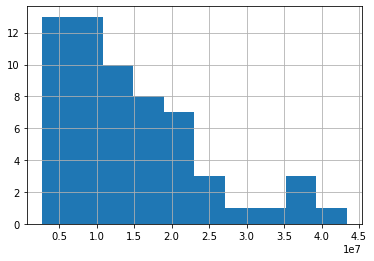

In [48]:
#################### 2022년 연봉 분포를 출력
pitcher["2022_Salary"].hist(bins = 10)

### 히스토그램 : 연봉의 분포를 파악 가능

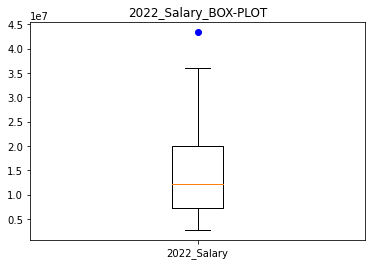

In [49]:
plt.boxplot(pitcher["2022_Salary"], sym = "bo") # outlier 이상치 색깔 푸른색으로 설정
plt.title('2022_Salary_BOX-PLOT')
plt.xticks([1], ['2022_Salary'])
plt.show()

### 박스 내부의 가로 선(빨간선) : 중앙값
### 최대값(중앙값 + 1.5 * IQR보다 작은 데이더 중 가장 작은 값), 최소값(중앙값 - 1.5 * IQR보다 큰 데이더 중 가장 작은 값)
### IQR(4분범위) : 75번째 백분위수와 25번째 백분위수 간의 차이 (3사분위수 - 1사분위수)
### 박스 위 : 3사 분위수
### 박스 아래 : 1사 분위수
### 특이점(outlier) : 최대값보다 크거나 최소값보다 작은 데이터가 해당

In [50]:
# box plot : 연봉의 일반적인 범주를 파악 가능
# '2500만 달러 이상'을 받는 선수는 별로 많지 않음 -> 250만 달러 미만의 연봉이 일반적으로 보임
# 각각의 피처들은 어떤 특성을 가지고 있을까?

In [51]:
pitcher.info

<bound method DataFrame.info of                   Name Pos Age 2021_Salary 2022_Salary  wins  losses  saves  \
1          Gerrit Cole  SP  30    36000000    36000000    13       8      0   
2         Jacob deGrom  SP  33    36000000    36000000     5       4      0   
3         Zack Greinke  SP  37    35000000    13000000     4       9      0   
4    Stephen Strasburg  SP  32    35000000    35000000     0       1      0   
5         Max Scherzer  SP  36    34603480    43333333    11       5      0   
6     Justin Verlander  SP  38    33000000    25000000    18       4      0   
7         Trevor Bauer  SP  30    31333333    35333333    12       3      0   
8      Clayton Kershaw  SP  33    31000000    17300000     6      19      0   
9           Chris Sale  SP  32    30000000    30000000    16       8      0   
10      Patrick Corbin  SP  31    24416666    23416666    12       7      0   
11          Yu Darvish  SP  34    23000000    20000000     8      10      0   
12        Zack Wheel

In [52]:
# '선수명'이나 '포지션'과 같이 그래프로 표현할 수 없는 것들을 제외
num_val = pitcher.drop('Pos', axis=1)
num_val = num_val.drop('Name', axis=1)

In [53]:
num_val

,Age,2021_Salary,2022_Salary,wins,losses,saves,holds,blownSaves,gamesPlayed,gamesStarted,inningsPitched,strikeOuts,baseOnBalls,hits,homeRuns,era
1,30,36000000,36000000,13,8,0,0,0,33,33,200.2,257,50,154,33,3.50
2,33,36000000,36000000,5,4,0,0,0,11,11,64.1,102,8,40,9,3.08
3,37,35000000,13000000,4,9,0,0,0,26,26,137.0,73,27,157,14,3.68
4,32,35000000,35000000,0,1,0,0,0,1,1,4.2,5,2,8,1,13.50
5,36,34603480,43333333,11,5,0,0,0,23,23,145.1,173,24,108,13,2.29
6,38,33000000,25000000,18,4,0,0,0,28,28,175.0,185,29,116,12,1.75
7,30,31333333,35333333,12,3,0,0,0,22,22,126.1,137,23,96,10,2.28
8,33,31000000,17300000,6,19,0,0,0,31,31,152.2,128,49,210,27,6.31
9,32,30000000,30000000,16,8,0,0,0,30,30,194.2,197,37,148,22,3.10
10,31,24416666,23416666,12,7,0,0,0,26,26,153.0,163,34,125,13,2.82


In [54]:
# 회기 분석에 사용할 것들을 살펴보자

In [55]:
def plot_hist_each_column(num_val):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    
    # num_val의 column 갯수 만큼의 subplot을 출력합니다.
    for i in range(len(num_val.columns)):
        ax = fig.add_subplot(4, 4, i+1)
        plt.hist(num_val[num_val.columns[i]], bins=20)
        ax.set_title(num_val.columns[i])
    plt.show()

In [56]:
import platform # 현재 사용하고 있는 시스템 유형을 알기 위해서

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False # -1과 같은 값들이 깨지지 않게 하기 위해서 설정
# matplotlib 은 그래프를 그리기 위해 
# Runtime Configuration Parameters, 줄여서 rcParams라는 딕셔너리의 값을 이용해서 그림을 그림.

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    print('Mac version')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print('Windows version')
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumFont/NanumGothicBold.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('Linux version')
else:
    print('Unknown system.')

Mac version


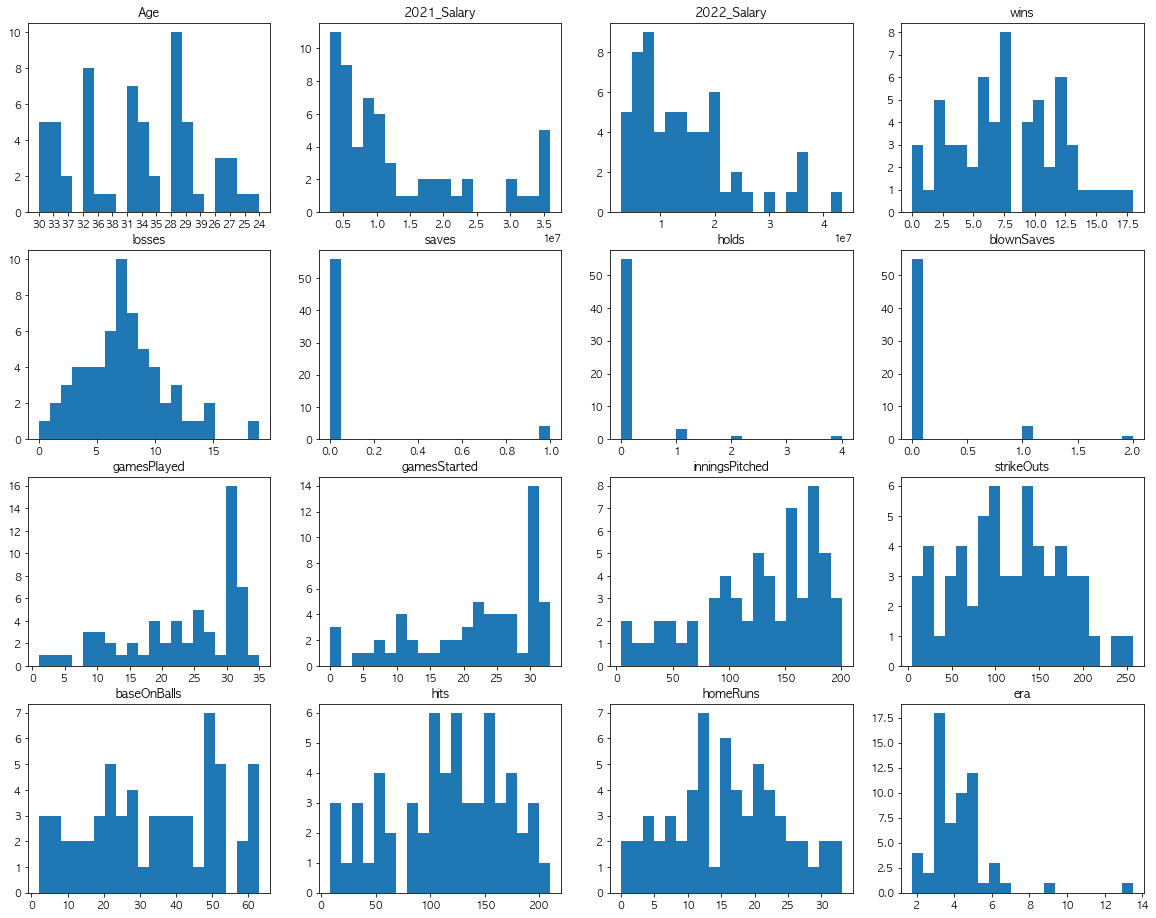

In [57]:
plot_hist_each_column(num_val)

### 위는 '선수명'이나 '포지션'과 같이 그래프로 표현할 수 없는 것들을 제외한 뒤, 모든 수치형 투수의 분포를 시각화한 것
### --> 몇몇 피처들이 매우 불균형한 분포를 가지고 있다는 것을 알 수 있게 해줌.
### 또한, 각 그래프마다 단위가 다름 -> 정규화와 스케일링 안 된 DATA

# 투수의 연봉 예측하기

#### -여러 가지 스케일링 방법 중 표준화 방법을 적용
#### -표준화? 정규분포에서 z-값을 구하는 과정과 동일
#### -z-값은 ((X)-(X의평균) / X의 표준편차
#### -단위 맞춰주기 = 피처 스케일링

In [58]:
# pandas 형태로 정의된 데이터를 출력 시, 과학적 표기법이 아닌 float 모양으로 출력되게 해준다.
pd.options.mode.chained_assignment = None

In [59]:
# 각각에 대한 scaling을 수행하는 함수 정의
def standard_scaling(pitcher, scale_columns):
    for col in scale_columns:
        series_mean = pitcher[col].mean()
        series_std = pitcher[col].std()
        pitcher[col] = pitcher[col].apply(lambda x: (x-series_mean)/series_std)
    return pitcher

In [60]:
# scaling을 수행
scale_columns = ['2021_Salary', '2022_Salary', 'wins', 'losses', 'saves', 'holds', 'blownSaves', 'gamesPlayed',
                 'gamesStarted', 'inningsPitched', 'strikeOuts', 'baseOnBalls', 'hits', 'homeRuns', 'era']
pitcher_df = standard_scaling(pitcher, scale_columns)

In [61]:
pitcher_df = pitcher_df.rename(columns={'2022_Salary': 'y'})
pitcher_df.head(10)

,Name,Pos,Age,2021_Salary,y,wins,losses,saves,holds,blownSaves,gamesPlayed,gamesStarted,inningsPitched,strikeOuts,baseOnBalls,hits,homeRuns,era
1,Gerrit Cole,SP,30,2.235794,2.280759,1.183878,0.189914,-0.265025,-0.247621,-0.282365,1.101336,1.183658,1.403023,2.338862,0.919004,0.723400,2.053672,-0.449490
2,Jacob deGrom,SP,33,2.235794,2.280759,-0.643329,-0.870070,-0.265025,-0.247621,-0.282365,-1.405153,-1.137930,-1.198377,-0.225861,-1.490871,-1.431677,-0.831487,-0.690750
3,Zack Greinke,SP,37,2.137722,-0.163065,-0.871730,0.454909,-0.265025,-0.247621,-0.282365,0.303817,0.444971,0.195025,-0.705712,-0.400689,0.780113,-0.230412,-0.346093
4,Stephen Strasburg,SP,32,2.137722,2.174505,-1.785334,-1.665057,-0.265025,-0.247621,-0.282365,-2.544466,-2.193197,-2.343299,-1.830881,-1.835138,-2.036611,-1.793206,5.294789
5,Max Scherzer,SP,36,2.098834,3.059949,0.727076,-0.605074,-0.265025,-0.247621,-0.282365,-0.037977,0.128391,0.349848,0.948948,-0.572823,-0.146192,-0.350627,-1.144548
6,Justin Verlander,SP,38,1.941578,1.111973,2.325883,-0.870070,-0.265025,-0.247621,-0.282365,0.531680,0.656025,0.921353,1.147507,-0.285933,0.005041,-0.470842,-1.454739
7,Trevor Bauer,SP,30,1.778125,2.209923,0.955477,-1.135065,-0.265025,-0.247621,-0.282365,-0.151908,0.022864,-0.013316,0.353270,-0.630201,-0.373043,-0.711272,-1.150292
8,Clayton Kershaw,SP,33,1.745434,0.293824,-0.414928,3.104867,-0.265025,-0.247621,-0.282365,0.873473,0.972605,0.485556,0.204351,0.861626,1.782035,1.332382,1.164653
9,Chris Sale,SP,32,1.647363,1.643239,1.869081,0.189914,-0.265025,-0.247621,-0.282365,0.759542,0.867078,1.288340,1.346066,0.173090,0.609975,0.731308,-0.679261
10,Patrick Corbin,SP,31,1.099795,0.943739,0.955477,-0.075082,-0.265025,-0.247621,-0.282365,0.303817,0.444971,0.500848,0.783482,0.000956,0.175179,-0.350627,-0.840101


#### 연속형이 아닌 범주형 요소 정규화 방법
#### get_dummies()함수 이용 : 원-핫 인코딩 적용(요소들의 단위 맞춰주기)
#### 여기선 Starting Pitcher로 포지션은 같지만, 추후 팀명이나 다른 포지션들을 추가해서 해볼 때 사용할 수 있음!

In [62]:
Pos_encoding = pd.get_dummies(pitcher_df['Pos'])
pitcher_df = pitcher_df.drop('Pos', axis=1)
pitcher_df = pitcher_df.join(Pos_encoding)

In [63]:
Pos_encoding.head(5)

,SP
1,1
2,1
3,1
4,1
5,1


In [64]:
# 끝에 포지션인 SP가 열명으로 들어가고 1로 되어있는 것을 확인할 수 있음
pitcher_df.head()

,Name,Age,2021_Salary,y,wins,losses,saves,holds,blownSaves,gamesPlayed,gamesStarted,inningsPitched,strikeOuts,baseOnBalls,hits,homeRuns,era,SP
1,Gerrit Cole,30,2.235794,2.280759,1.183878,0.189914,-0.265025,-0.247621,-0.282365,1.101336,1.183658,1.403023,2.338862,0.919004,0.723400,2.053672,-0.449490,1
2,Jacob deGrom,33,2.235794,2.280759,-0.643329,-0.870070,-0.265025,-0.247621,-0.282365,-1.405153,-1.137930,-1.198377,-0.225861,-1.490871,-1.431677,-0.831487,-0.690750,1
3,Zack Greinke,37,2.137722,-0.163065,-0.871730,0.454909,-0.265025,-0.247621,-0.282365,0.303817,0.444971,0.195025,-0.705712,-0.400689,0.780113,-0.230412,-0.346093,1
4,Stephen Strasburg,32,2.137722,2.174505,-1.785334,-1.665057,-0.265025,-0.247621,-0.282365,-2.544466,-2.193197,-2.343299,-1.830881,-1.835138,-2.036611,-1.793206,5.294789,1
5,Max Scherzer,36,2.098834,3.059949,0.727076,-0.605074,-0.265025,-0.247621,-0.282365,-0.037977,0.128391,0.349848,0.948948,-0.572823,-0.146192,-0.350627,-1.144548,1


## 회귀 분석 모델 학습 준비 : 학습 데이터셋 & 테스트 데이터셋 분리 필요
### Python sklearn의 train_test_split() 함수 이용

In [65]:
pitcher_df = pitcher_df.astype({"Age" : "float",
                          "SP" : "float"})

In [66]:
pitcher_df

,Name,Age,2021_Salary,y,wins,losses,saves,holds,blownSaves,gamesPlayed,gamesStarted,inningsPitched,strikeOuts,baseOnBalls,hits,homeRuns,era,SP
1,Gerrit Cole,30.0,2.235794,2.280759,1.183878,0.189914,-0.265025,-0.247621,-0.282365,1.101336,1.183658,1.403023,2.338862,0.919004,0.723400,2.053672,-0.449490,1.0
2,Jacob deGrom,33.0,2.235794,2.280759,-0.643329,-0.870070,-0.265025,-0.247621,-0.282365,-1.405153,-1.137930,-1.198377,-0.225861,-1.490871,-1.431677,-0.831487,-0.690750,1.0
3,Zack Greinke,37.0,2.137722,-0.163065,-0.871730,0.454909,-0.265025,-0.247621,-0.282365,0.303817,0.444971,0.195025,-0.705712,-0.400689,0.780113,-0.230412,-0.346093,1.0
4,Stephen Strasburg,32.0,2.137722,2.174505,-1.785334,-1.665057,-0.265025,-0.247621,-0.282365,-2.544466,-2.193197,-2.343299,-1.830881,-1.835138,-2.036611,-1.793206,5.294789,1.0
5,Max Scherzer,36.0,2.098834,3.059949,0.727076,-0.605074,-0.265025,-0.247621,-0.282365,-0.037977,0.128391,0.349848,0.948948,-0.572823,-0.146192,-0.350627,-1.144548,1.0
6,Justin Verlander,38.0,1.941578,1.111973,2.325883,-0.870070,-0.265025,-0.247621,-0.282365,0.531680,0.656025,0.921353,1.147507,-0.285933,0.005041,-0.470842,-1.454739,1.0
7,Trevor Bauer,30.0,1.778125,2.209923,0.955477,-1.135065,-0.265025,-0.247621,-0.282365,-0.151908,0.022864,-0.013316,0.353270,-0.630201,-0.373043,-0.711272,-1.150292,1.0
8,Clayton Kershaw,33.0,1.745434,0.293824,-0.414928,3.104867,-0.265025,-0.247621,-0.282365,0.873473,0.972605,0.485556,0.204351,0.861626,1.782035,1.332382,1.164653,1.0
9,Chris Sale,32.0,1.647363,1.643239,1.869081,0.189914,-0.265025,-0.247621,-0.282365,0.759542,0.867078,1.288340,1.346066,0.173090,0.609975,0.731308,-0.679261,1.0
10,Patrick Corbin,31.0,1.099795,0.943739,0.955477,-0.075082,-0.265025,-0.247621,-0.282365,0.303817,0.444971,0.500848,0.783482,0.000956,0.175179,-0.350627,-0.840101,1.0


In [67]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 회귀 분석을 위한 학습, 테스트 데이터셋 분리
X = pitcher_df[pitcher_df.columns.difference(['Name', 'y'])]
y = pitcher_df['y']
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=19)

In [68]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 45 to 30
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   2021_Salary     48 non-null     float64
 1   Age             48 non-null     float64
 2   SP              48 non-null     float64
 3   baseOnBalls     48 non-null     float64
 4   blownSaves      48 non-null     float64
 5   era             48 non-null     float64
 6   gamesPlayed     48 non-null     float64
 7   gamesStarted    48 non-null     float64
 8   hits            48 non-null     float64
 9   holds           48 non-null     float64
 10  homeRuns        48 non-null     float64
 11  inningsPitched  48 non-null     float64
 12  losses          48 non-null     float64
 13  saves           48 non-null     float64
 14  strikeOuts      48 non-null     float64
 15  wins            48 non-null     float64
dtypes: float64(16)
memory usage: 6.4 KB


In [1]:
# sklearn 라이브러리의 LinearRegression()으로 모델 오브젝트를 선언한 뒤,
# 해당 오브젝트에 model=lr.fit(X_train, y_train) 코드를 실행 -> 학습이 완료된 회귀식의 계수를 출력

# 회귀 분석 계수 학습 (회귀 모델 학습)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 학습된 계수를 출력
print(lr.coef_)

NameError: name 'linear_model' is not defined

In [ ]:
import statsmodels.api as sm

# statsmodel library로 회귀 분석을 수행
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

### 결정 계수(R-squared), 수정 결정 계수(Adj, R-squared)가
### 1에 가까울수록 데이터를 잘 설명하는 모델

### 일반적으로 P-value가 0.05 이하면 'F 통계량이 유의한 의미를 가진다'고 함.


## 어떤 요소가 연봉에 강하게 영향을 미칠까?

In [ ]:
# 회귀 계수를 리스트로 반환
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명을 리스트로 반환
x_labels = model.params.index.tolist()

# 회귀 계수 출력
ax = coefs_series.plot(kind='bar')
ax.set_title('coef_graph')
ax.set_xlabel('features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

In [ ]:
# 학습 데이터와 테스트 데이터로 분리한다.
X= picher_df[pitcher_df.columns.difference(['Name', 'y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# 회귀 분석 모델을 학습하자
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 회귀 분석 모델을 평가한다.
print(model.score(X_train, y_train)) # train R2 score를 출력
print(model.score(X_test, y_test)) # test R2 score를 출력

### 두 점수는 최대한 벌어지지 않는 것이 좋음
### train score > test score : 과적합
###    비유) 모의고사에만 특화된 공부를 한 나머지, 실제 시험의 새로운 유형에 적응하지 못하는 경우

In [ ]:
# 요소들의 상관 관계 확인을 위해 heatmap 방식의 시각화

import seaborn as sns

# 피처간의 상관계수 행렬을 계산
corr = pitcher_df[scale_columns].corr(method='pearson')
show_cols = ['2021_Salary', 'wins', 'losses', 'saves', 'holds', 'blownSaves', 'gamesPlayed',
                 'gamesStarted', 'inningsPitched', 'strikeOuts', 'baseOnBalls', 'hits', 'homeRuns', 'era']

# corr 행렬 히트맵을 시각화
plt.rc('font', family='NanumGothicOTF')
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=show_cols,
            xticklabels=show_cols)

plt.tight_layout()
plt.show()

#### 회귀 분석의 전제 : 독립성
####     -->올바른 회귀 분석을 위해 요소 쌍 제거 필요 --> 다중 공선성 확인

#### *다중 공선성 : 변수 간 상관 관계가 높아 분석에 부정적인 영향을 미치는 것
    
#### 다중 공선성은 분산팽창요인(Variance Inflation Factor)이라는 계수로 평가 가능
#### VIF 계수가 10~15 정도가 넘음년 다중 공선성의 문제가 발생한 것으로 판단

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 피처마다의 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

In [ ]:
# VIF 계수가 높은 요소들 우선적 제거 후 다시 train

# 피처를 재선정
X = picher_df[['2021_Salary', 'wins', 'losses', 'saves', 'holds', 'blownSaves', 'gamesPlayed',
                 'gamesStarted', 'inningsPitched', 'strikeOuts', 'baseOnBalls', 'hits', 'homeRuns', 'era']]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [ ]:
# 모델을 학습
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [ ]:
# 결과 출력
print(model.score(X_train, y_train)) # train R2 score를 출력
print(model.score(X_test, y_test)) # test R2 score를 출력

In [ ]:
# 피처마다의 VIF 계수를 출력
X = pitcher_df[['2021_Salary', 'wins', 'losses', 'saves', 'holds', 'blownSaves', 'gamesPlayed',
                 'gamesStarted', 'inningsPitched', 'strikeOuts', 'baseOnBalls', 'hits', 'homeRuns', 'era']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

# 분석 결과 시각화

In [ ]:
# 2022년 연봉을 예측하여 데이터프레임의 column으로 생성
X = picher_df[['2021_Salary', 'wins', 'losses', 'saves', 'holds', 'blownSaves', 'gamesPlayed',
                 'gamesStarted', 'inningsPitched', 'strikeOuts', 'baseOnBalls', 'hits', 'homeRuns', 'era']]
predict_2022_Salary = lr.predict(X)
pitcher_df['2022_Salary'] = pd.Series(predict_2022_Salary)

In [ ]:
# 원래의 데이터 프레임을 다시 로드
pitcher = this_df
pitcher = pitcher[['Name', '2021_Salary']]

# 원래의 데이터 프레임에 2022년 연봉 정보를 합친다.
result_df = pitcher_df.sort_values(by=['y'], ascending=False)
result_df.drop(['2021_Salary'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(picher, on=['Name'], how='left')
result_df = result_df[['Name', 'y', 'predict_2022_Salary', '2021_Salary']]
result_df.columns = ['Name', '2022_Salary', 'predict_2022_Salary', '2021_Salary(2017)']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰
result_df = result_df[result_df['2021_Salary'] != result_df['2022_Salary']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]

In [ ]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    print('Mac version')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print('Windows version')
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumFont/NanumGothicBold.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('Linux version')
else:
    print('Unknown system... sorry~~~~')

In [ ]:
# 선수별 연봉 정보(작년연봉, 예측연봉, 실제연봉)를 막대 그래프로 출력한다.
result_df.plot(x='Name', y=['2021_Salary', 'predict_2022_Salary', '2022_Salary'],
              kind="bar")